In [1]:
print "Steering File"
print "Select which variable to choose as energy proxy."

import glob
import numpy
import sys, os
import tables
from decimal import Decimal

isqgsjet = True
isML     = False
lowenedir = '/Users/ramesh/GoogleDrive/LowEnergy/'
pdgcode_dict       = {
                        'proton':2212,
                        'helium':1000020040,
                        'oxygen':1000080160,
                        'iron'  :1000260560
                     }

Steering File
Select which variable to choose as energy proxy.


In [2]:
# Calculate GSF weight on each event.
if isqgsjet:
    datadir  = '/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2QGSJET/'
else:
    datadir  = '/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/'
    
simfiles = glob.glob(datadir+'Level2_*Background_SRT_ML*.h5')
    
print simfiles[0], len(simfiles)

# Required to get hits tank position, its charge, and its time.
sys.path.append('/Users/ramesh/GoogleDrive/LowEnergy/TankWiseLaputop')
from weighting import weighting_GSF

# Set up empty array to fill it later.
'''
WeightGSFL = numpy.array([])
WeightGSFM = numpy.array([])
WeightGSFH = numpy.array([])
WeightGSF1parL = numpy.array([])
WeightGSF1parM = numpy.array([])
WeightGSF1parH = numpy.array([])'''

sum_wt = 0
counter = 0

# Start collecting all the necessary information.
for hdffile in simfiles: # file_list defined in steering file.
    counter += 1
    hf       = tables.open_file(hdffile, 'a')
    if ('10410' in hdffile) or ('9508' in hdffile) or ('10951' in hdffile) or ('20252' in hdffile):
        element = 'proton'
    elif ('11663' in hdffile) or ('7362' in hdffile) or ('12583' in hdffile) or ('20253' in hdffile):
        element = 'helium'
    elif ('12605' in hdffile) or ('7364' in hdffile) or ('12584' in hdffile) or ('20254' in hdffile):
        element = 'oxygen'
    elif ('10889' in hdffile) or ('9614' in hdffile) or ('10954' in hdffile) or ('20255' in hdffile):
        element = 'iron'

    if ('MCPrimary' in hf.root) and ('SeededRTSLCPulses' in hf.root):
        if counter%50==0:
            print hdffile, "....", counter
        energy           = hf.root.MCPrimary.cols.energy[:]

        wtL     = weighting_GSF(energy, element, which_flux='low', isqgsjet=isqgsjet)
        wt1parL = weighting_GSF(energy, element, do='all_particle_flux', which_flux='low', isqgsjet=isqgsjet)
        wtM     = weighting_GSF(energy, element, which_flux='median', isqgsjet=isqgsjet)
        wt1parM = weighting_GSF(energy, element, do='all_particle_flux', which_flux='median', isqgsjet=isqgsjet)
        wtH     = weighting_GSF(energy, element, which_flux='high', isqgsjet=isqgsjet)
        wt1parH = weighting_GSF(energy, element, do='all_particle_flux', which_flux='high', isqgsjet=isqgsjet)
        #wtL = energy*hf.root.WeightGSFL[:]
        #wtM = energy*hf.root.WeightGSFM[:]
        #wtH = energy*hf.root.WeightGSFH[:]
        #wt1parL = energy*hf.root.Weight1ParticleAssumptionGSFL[:]
        #wt1parM = energy*hf.root.Weight1ParticleAssumptionGSFM[:]
        #wt1parH = energy*hf.root.Weight1ParticleAssumptionGSFH[:]
        if 'WeightGSFL' in hf.root:
            hf.remove_node('/', 'WeightGSFL')
        if 'WeightGSFM' in hf.root:
            hf.remove_node('/', 'WeightGSFM')
        if 'WeightGSFH' in hf.root:
            hf.remove_node('/', 'WeightGSFH')
        if 'Weight1ParticleAssumptionGSFL' in hf.root:
            hf.remove_node('/', 'Weight1ParticleAssumptionGSFL')
        if 'Weight1ParticleAssumptionGSFM' in hf.root:
            hf.remove_node('/', 'Weight1ParticleAssumptionGSFM')
        if 'Weight1ParticleAssumptionGSFH' in hf.root:
            hf.remove_node('/', 'Weight1ParticleAssumptionGSFH')
        hf.create_array('/', 'WeightGSFL', wtL)
        hf.create_array('/', 'WeightGSFM', wtM)
        hf.create_array('/', 'WeightGSFH', wtH)
        hf.create_array('/', 'Weight1ParticleAssumptionGSFL', wt1parL)
        hf.create_array('/', 'Weight1ParticleAssumptionGSFM', wt1parM)
        hf.create_array('/', 'Weight1ParticleAssumptionGSFH', wt1parH)

    hf.close()

print "Done calculating GSF model weight."

/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_5.0_Background_SRT_ML.h5 2116


/Users/ramesh/GoogleDrive/LowEnergy/TankWiseLaputop/weighting.py:166: RuntimeWarning: invalid value encountered in sqrt
  yerr = numpy.diag(ycov) ** 0.5
/Users/ramesh/GoogleDrive/LowEnergy/TankWiseLaputop/weighting.py:440: RuntimeWarning: divide by zero encountered in divide
  wt      = E*flux_population*dlnE*acceptance/Ngen
/Users/ramesh/GoogleDrive/LowEnergy/TankWiseLaputop/weighting.py:440: RuntimeWarning: invalid value encountered in divide
  wt      = E*flux_population*dlnE*acceptance/Ngen


/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_6.3_Background_SRT_ML_0.h5 .... 50
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_6.8_Background_SRT_ML_0.h5 .... 100
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_7.0_Background_SRT_ML_30.h5 .... 150
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_7.0_Background_SRT_ML_80.h5 .... 200
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_7.1_Background_SRT_ML_30.h5 .... 250
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_7.1_Background_SRT_ML_80.h5 .... 300
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_7.2_Background_SRT_ML_30.h5 .... 350
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_7.2_Background_SRT_ML_80.h5 .... 400
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_7.3_Background_SRT_ML_30.h5 .... 450
/Use

In [2]:
# Calculate GSF weight on each event.
datadir  = '/Users/ramesh/GoogleDrive/LowEnergy/'
    
# Required to get hits tank position, its charge, and its time.
sys.path.append('/Users/ramesh/GoogleDrive/LowEnergy/TankWiseLaputop')
from weighting import weighting_GSF

# Set up empty array to fill it later.
'''
WeightGSFL = numpy.array([])
WeightGSFM = numpy.array([])
WeightGSFH = numpy.array([])
WeightGSF1parL = numpy.array([])
WeightGSF1parM = numpy.array([])
WeightGSF1parH = numpy.array([])'''

sum_wt = 0
counter = 0

# Start collecting all the necessary information.
#hf      = tables.open_file(datadir+'analysis_simulation_HLCCoreSeed_slcQcut_1sthalf.h5', 'a')
#hf      = tables.open_file(datadir+'analysis_simulation_HLCCoreSeed_slcQcut_2ndhalf.h5', 'a')
#hf      = tables.open_file(datadir+'analysis_simulation_HLCCoreSeed_slcQcut_final.h5', 'a')
hf      = tables.open_file(datadir+'analysis_simulation_HLCCoreSeed_slcQcut_everything_qgsjet_final.h5', 'a')
isqgsjet = True
Tenergy = hf.root.Energy[:]
pdgcode = hf.root.pdg_encoding[:]
wtL     = numpy.ones(len(Tenergy))
wt1parL = numpy.ones(len(Tenergy))
wtM     = numpy.ones(len(Tenergy))
wt1parM = numpy.ones(len(Tenergy))
wtH     = numpy.ones(len(Tenergy))
wt1parH = numpy.ones(len(Tenergy))
for pdg in [2212, 1000020040, 1000080160, 1000260560]: # file_list defined in steering file.
    print pdg
    if pdg==2212:
        element = 'proton'
    elif pdg==1000020040:
        element = 'helium'
    elif pdg==1000080160:
        element = 'oxygen'
    elif pdg==1000260560:
        element = 'iron'
        
    mask = pdgcode==pdg
    energy = Tenergy[mask]
    
    wtL[numpy.where(mask)]     = weighting_GSF(energy, element, which_flux='low', isqgsjet=isqgsjet)
    wt1parL[numpy.where(mask)] = weighting_GSF(energy, element, do='all_particle_flux', which_flux='low', isqgsjet=isqgsjet)
    wtM[numpy.where(mask)]     = weighting_GSF(energy, element, which_flux='median', isqgsjet=isqgsjet)
    wt1parM[numpy.where(mask)] = weighting_GSF(energy, element, do='all_particle_flux', which_flux='median', isqgsjet=isqgsjet)
    wtH[numpy.where(mask)]     = weighting_GSF(energy, element, which_flux='high', isqgsjet=isqgsjet)
    wt1parH[numpy.where(mask)] = weighting_GSF(energy, element, do='all_particle_flux', which_flux='high', isqgsjet=isqgsjet)
    #wtL = energy*hf.root.WeightGSFL[:]
    #wtM = energy*hf.root.WeightGSFM[:]
    #wtH = energy*hf.root.WeightGSFH[:]
    #wt1parL = energy*hf.root.Weight1ParticleAssumptionGSFL[:]
    #wt1parM = energy*hf.root.Weight1ParticleAssumptionGSFM[:]
    #wt1parH = energy*hf.root.Weight1ParticleAssumptionGSFH[:]
            
print len(wtL), len(wtM), len(wtH), len(wt1parL), len(wt1parM), len(wt1parH)
if 'WeightGSFL' in hf.root:
    hf.remove_node('/', 'WeightGSFL')
if 'WeightGSFM' in hf.root:
    hf.remove_node('/', 'WeightGSFM')
if 'WeightGSFH' in hf.root:
    hf.remove_node('/', 'WeightGSFH')
if 'Weight1ParticleAssumptionGSFL' in hf.root:
    hf.remove_node('/', 'Weight1ParticleAssumptionGSFL')
if 'Weight1ParticleAssumptionGSFM' in hf.root:
    hf.remove_node('/', 'Weight1ParticleAssumptionGSFM')
if 'Weight1ParticleAssumptionGSFH' in hf.root:
    hf.remove_node('/', 'Weight1ParticleAssumptionGSFH')
hf.create_array('/', 'WeightGSFL', wtL)
hf.create_array('/', 'WeightGSFM', wtM)
hf.create_array('/', 'WeightGSFH', wtH)
hf.create_array('/', 'Weight1ParticleAssumptionGSFL', wt1parL)
hf.create_array('/', 'Weight1ParticleAssumptionGSFM', wt1parM)
hf.create_array('/', 'Weight1ParticleAssumptionGSFH', wt1parH)


hf.close()
print "Done calculating GSF model weight."

2212
qgsjet proton


/Users/ramesh/GoogleDrive/LowEnergy/TankWiseLaputop/weighting.py:210: RuntimeWarning: invalid value encountered in sqrt
  yerr = numpy.diag(ycov) ** 0.5
/Users/ramesh/GoogleDrive/LowEnergy/TankWiseLaputop/weighting.py:535: RuntimeWarning: divide by zero encountered in divide
  wt      = E*flux_population*dlnE*acceptance/Ngen
/Users/ramesh/GoogleDrive/LowEnergy/TankWiseLaputop/weighting.py:535: RuntimeWarning: invalid value encountered in divide
  wt      = E*flux_population*dlnE*acceptance/Ngen


qgsjet proton
qgsjet proton
qgsjet proton
qgsjet proton
qgsjet proton
1000020040
qgsjet helium
qgsjet helium
qgsjet helium
qgsjet helium
qgsjet helium
qgsjet helium
1000080160
qgsjet oxygen
qgsjet oxygen
qgsjet oxygen
qgsjet oxygen
qgsjet oxygen
qgsjet oxygen
1000260560
qgsjet iron
qgsjet iron
qgsjet iron
qgsjet iron
qgsjet iron
qgsjet iron
73865 73865 73865 73865 73865 73865
Done calculating GSF model weight.


In [3]:
# Calculate GSF weight on each event.
datadir  = '/Users/ramesh/GoogleDrive/LowEnergy/'
    
# Required to get hits tank position, its charge, and its time.
sys.path.append('/Users/ramesh/GoogleDrive/LowEnergy/TankWiseLaputop')
from weighting import weighting_H4a

sum_wt = 0
counter = 0

# Start collecting all the necessary information.
#hf      = tables.open_file(datadir+'analysis_simulation_HLCCoreSeed_slcQcut_1sthalf.h5', 'a')
#hf      = tables.open_file(datadir+'analysis_simulation_HLCCoreSeed_slcQcut_2ndhalf.h5', 'a')
#hf      = tables.open_file(datadir+'analysis_simulation_HLCCoreSeed_slcQcut_final.h5', 'a')
#hf      = tables.open_file(datadir+'analysis_simulation_HLCCoreSeed_slcQcut_qgsjet_1sthalf.h5', 'a')
#hf      = tables.open_file(datadir+'analysis_simulation_HLCCoreSeed_slcQcut_qgsjet_2ndhalf.h5', 'a')
hf      = tables.open_file(datadir+'analysis_simulation_HLCCoreSeed_slcQcut_everything_qgsjet_final.h5', 'a')
#hf      = tables.open_file(datadir+'analysis_simulation_HLCCoreSeed_qgsjet_all.h5', 'a')
Tenergy = hf.root.Energy[:]
pdgcode = hf.root.pdg_encoding[:]
wt      = numpy.ones(len(Tenergy))
wt1par  = numpy.ones(len(Tenergy))
for pdg in [2212, 1000020040, 1000080160, 1000260560]: # file_list defined in steering file.
    print pdg
    if pdg==2212:
        element = 'proton'
    elif pdg==1000020040:
        element = 'helium'
    elif pdg==1000080160:
        element = 'oxygen'
    elif pdg==1000260560:
        element = 'iron'
        
    mask = pdgcode==pdg
    energy = Tenergy[mask]
    
    wt[numpy.where(mask)]     = weighting_H4a(energy, element, isqgsjet=True)
    wt1par[numpy.where(mask)] = weighting_H4a(energy, element, do='all_particle_flux', isqgsjet=True)

print len(wt), len(wt1par)
if 'WeightH4a' in hf.root:
    hf.remove_node('/', 'WeightH4a')
if 'Weight1ParticleAssumptionH4a' in hf.root:
    hf.remove_node('/', 'Weight1ParticleAssumptionH4a')
    
hf.create_array('/', 'WeightH4a', wt)
hf.create_array('/', 'Weight1ParticleAssumptionH4a', wt1par)
hf.close()

print "Done calculating H4a model weight."

2212
qgsjet proton
qgsjet proton
1000020040
qgsjet helium
qgsjet helium
1000080160
qgsjet oxygen
qgsjet oxygen
1000260560
qgsjet iron
qgsjet iron
73865 73865
Done calculating H4a model weight.


In [2]:
import numpy, sys
import tables

datadir   = '/Users/ramesh/GoogleDrive/LowEnergy/'
mcdirpath = '/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/MCPrimaryInfo/'

# Required to get hits tank position, its charge, and its time.
sys.path.append('/Users/ramesh/GoogleDrive/LowEnergy/TankWiseLaputop')
from weighting import weighting_H4a

sum_wt = 0
counter = 0

# Start collecting all the necessary information.
element = 'proton'
hf      = tables.open_file(mcdirpath+'detector_sim_mcprimary_'+element+'.h5')
Tenergy = hf.root.MCPrimary.cols.energy[:]
hf.close()

wt     = weighting_H4a(Tenergy, element)
wt1par = weighting_H4a(Tenergy, element, do='all_particle_flux')
    
wtName     = 'weight_'+element+'_h4a'
wt1ParName = 'weight_1ParAssumption_'+element+'_h4a'
hf      = tables.open_file(mcdirpath+'detector_sim_mcprimary_'+element+'.h5', 'a')
if wtName in hf.root:
    hf.remove_node('/', wtName)
if wt1ParName in hf.root:
    hf.remove_node('/', wt1ParName)
    
hf.create_array('/', wtName, wt)
hf.create_array('/', wt1ParName, wt1par)
hf.close()

print "Done calculating H4a model weight."


/Users/ramesh/GoogleDrive/LowEnergy/TankWiseLaputop/weighting.py:356: RuntimeWarning: divide by zero encountered in divide
  wt      = flux_population*dlnE*acceptance/Ngen


Done calculating H4a model weight.


[ 1.00577907  1.00543272  1.00585521  1.00619075  1.00590482  1.00603412
  1.00561     1.00611526  1.0054526   1.00578889  1.00586632  1.00373693
  1.00577711  1.00399406  1.00439832  1.00835524  1.00939635  1.00322234
  1.00652     1.00622628  1.01196427  1.00672156  1.00125061  1.00633185
  1.00834821  1.00541888  1.00813533  1.00538776  1.01275919  1.00700906
  1.00614568  1.00844923  1.0140182   1.01649428]


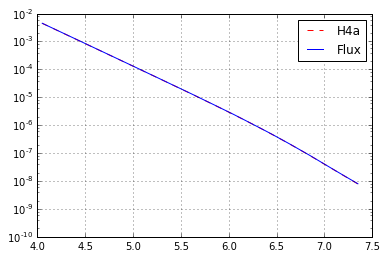

In [23]:
import numpy, sys
import tables
import matplotlib.pyplot as plt
%matplotlib inline

datadir   = '/Users/ramesh/GoogleDrive/LowEnergy/'
mcdirpath = '/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/MCPrimaryInfo/'

# Required to get hits tank position, its charge, and its time.
sys.path.append('/Users/ramesh/GoogleDrive/LowEnergy/TankWiseLaputop')
from weighting import weighting_H4a, H4a

def effective_area(eff, loge_bins, fitted=False):
    # This works both for effective area and its error.
    # Input: Efficiency, or Error on efficiency.
    
    truncated_bins = loge_bins[:-1] 
    if isinstance(eff, (numpy.ndarray, list)):
        pass
    elif isinstance(eff, (float, int)):
        eff = numpy.ones(len(truncated_bins)) * eff 

    RSim45 = 200.
    RSim56 = 400.
    RSim67 = 600.
    RSim78 = 800.

    AreaSim45 = numpy.pi*RSim45*RSim45
    AreaSim56 = numpy.pi*RSim56*RSim56
    AreaSim67 = numpy.pi*RSim67*RSim67
    AreaSim78 = numpy.pi*RSim78*RSim78

    mask45 = (truncated_bins>=4)*(truncated_bins<5)
    mask56 = (truncated_bins>=5)*(truncated_bins<6)
    mask67 = (truncated_bins>=6)*(truncated_bins<7)
    mask78 = (truncated_bins>=7)*(truncated_bins<8)

    Aeff         = numpy.zeros(len(eff))
    Aeff[mask45] = AreaSim45*(eff[mask45])
    Aeff[mask56] = AreaSim56*(eff[mask56])
    Aeff[mask67] = AreaSim67*(eff[mask67])
    Aeff[mask78] = AreaSim78*(eff[mask78])
    
    if fitted:
        mid_logE = 0.5*(loge_bins[1:]+loge_bins[:-1])
        effx = numpy.linspace(min(mid_logE),max(mid_logE),501)
        init = [max(Aeff), 5., 5.]
        mask = (mid_logE>=5.4)*(mid_logE<=7.0)
        popt, pcov = curve_fit(sigmoid_func, mid_logE[mask], Aeff[mask], 
                                 p0=init, sigma=ErrAeff[mask])
        Aeff               = sigmoid_func(mid_logE, *popt)
        return Aeff, popt

    else:
        return Aeff


# Start collecting all the necessary information.
model_bin = numpy.linspace(4,7.4,35)
mid_bin  = 0.5*(model_bin[1:] + model_bin[:-1])
E = 10**model_bin[:-1]
element = 'iron'
if element  =='proton':
    hdffilename = mcdirpath+'detector_sim_mcprimary_proton.h5'
    theta_max = [65.]
elif element=='helium':
    hdffilename = mcdirpath+'detector_sim_mcprimary_helium.h5'
    theta_max = sum(E<1.e5)*[40.] + sum(E>=1.e5)*[65.]
elif element=='oxygen':
    hdffilename = mcdirpath+'detector_sim_mcprimary_oxygen.h5'
    theta_max = sum(E<1.e5)*[40.] + sum(E>=1.e5)*[65.]
elif element=='iron':
    hdffilename = mcdirpath+'detector_sim_mcprimary_iron.h5'
    theta_max = [65.]

        
hf      = tables.open_file(hdffilename)
Tenergy = hf.root.MCPrimary.cols.energy[:]
wt      = hf.get_node('/', 'weight_1ParAssumption_%s_h4a'%element)[:]
#wt      = hf.get_node('/', 'weight_%s_h4a'%element)[:]
hf.close()

model_scaling_factor=1.
#model_h4a  = (model_scaling_factor*H4a(particle='all', E=10**model_bin))
model_h4a  = (model_scaling_factor*H4a(particle='all', E=10**mid_bin))

dA = effective_area(1., model_bin)
acceptance = numpy.pi*dA*(1. - (numpy.cos(numpy.deg2rad(numpy.array(theta_max)))**2))
dlnE       = 2.30258509299*numpy.diff(model_bin)
ty         = numpy.histogram(Tenergy, bins=10**model_bin, weights=wt)[0]
ftemp      = ty/(dlnE*acceptance)

plt.figure()
plt.plot(mid_bin, model_h4a, 'r--', label='H4a')
abc = plt.plot(mid_bin, ftemp, color='b', label='Flux')    
#plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-10,1e-2)
plt.legend()
plt.grid()
print ftemp/model_h4a

#ebins = numpy.linspace(4,7.4,50001)

In [3]:
import tables, numpy, glob

includegsf=False
if isqgsjet:
    datadir  = '/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2QGSJET/'
elif isML:
    datadir  = '/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/'
else:
    datadir  = '/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/'

particle = 'all'
par_list = ['proton', 'helium', 'oxygen', 'iron']
if (particle!='all') and (particle not in par_list):
    raise Exception("Please provide proper particle name from ['proton', 'helium', 'oxygen', 'iron']. You provided %s."%particle)
if particle=='proton':
    if isqgsjet: 
        filsL  = glob.glob(datadir+'Level2_20252*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_10951*Background_SRT*.h5')
    else:
        filsL  = glob.glob(datadir+'Level2_9508*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_10410*Background_SRT*.h5')
if particle=='helium':
    if isqgsjet: 
        filsL  = glob.glob(datadir+'Level2_20253*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_12583*Background_SRT*.h5')
    else:
        filsL  = glob.glob(datadir+'Level2_7362*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_11663*Background_SRT*.h5')
if particle=='oxygen':
    if isqgsjet:
        filsL  = glob.glob(datadir+'Level2_20254*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_12584*Background_SRT*.h5')
    else:
        filsL  = glob.glob(datadir+'Level2_7364*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_12605*Background_SRT*.h5')
if particle=='iron':
    if isqgsjet:
        filsLqgsjet  = glob.glob(datadir+'Level2_20255*Background_SRT*.h5')
        filsHqgsjet  = glob.glob(datadir+'Level2_10954*Background_SRT*.h5')
    else:
        filsL  = glob.glob(datadir+'Level2_9614*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_10889*Background_SRT*.h5')
if particle=='all':
    simfiles = glob.glob(datadir+'Level2_*Background_SRT_ML*.h5')
elif (particle in par_list):
    simfiles = filsL+filsH
    
#numpy.random.shuffle(simfiles)

leq = 35 # or 85
if isqgsjet:
    final_hdf_filename = lowenedir+'analysis_simulation_sta2_Ntanks_leq'+str(leq)+'_qgsjet_'+particle+'.h5'
elif isML:
    final_hdf_filename = lowenedir+'analysis_simulation_sta2_Ntanks_leq'+str(leq)+'_ML_'+particle+'.h5'
else:
    final_hdf_filename = lowenedir+'analysis_simulation_sta2_Ntanks_leq'+str(leq)+'_'+particle+'_allow.h5'

ebins = numpy.logspace(4,7,961)


# Required to get hits tank position, its charge, and its time.
import pickle
#sys.path.append('/Users/ramesh/GoogleDrive/LowEnergy/TankWiseLaputop')
#from weighting import weighting_H4a, weighting_GST, weighting_PolygonatoTG


om_dict       = {61:'A', 62:'A', 63:'B', 64:'B'}
tankpos_file  = open('icetop_geometry.txt', 'rb')
tank_position = pickle.load(tankpos_file)
tankpos_file.close()

tpx = numpy.array([j[0] for i in tank_position.values() for j in i.values()])
tpy = numpy.array([j[1] for i in tank_position.values() for j in i.values()])
tpz = numpy.array([j[2] for i in tank_position.values() for j in i.values()])

# This part provides the index where information of each tank of IceTop is stored.
index_dict = {}
count = 0
for sta in range(1,82):
    index_dict[sta] = {'A':count, 'B':count+1}
    count += 2

print "Running data from scratch. This may take upto 15 mins."
print "Files to process: "+str(len(simfiles))

# Set up empty array to fill it later.
Event     = numpy.array([])
Run       = numpy.array([])
PDG       = numpy.array([])
Qmax      = numpy.array([])
Qhillas   = numpy.array([])
Qtotal    = numpy.array([])
Qtotalhlc = numpy.array([])
T0        = numpy.array([])
Nsta      = numpy.array([])
Nslc      = numpy.array([])
Ntanks    = numpy.array([])
Tcorex    = numpy.array([])
Tcorey    = numpy.array([])
Rcorex    = numpy.array([])
Rcorey    = numpy.array([])
Plane_Zenith  = numpy.array([])
Plane_Azimuth = numpy.array([])
Rzenith   = numpy.array([])
Razimuth  = numpy.array([])
Tzenith   = numpy.array([])
Tazimuth  = numpy.array([])
Energy    = numpy.array([])
WeightPoly= numpy.array([])
WeightH4a = numpy.array([])
WeightGST = numpy.array([])
WeightL   = numpy.array([])
WeightM   = numpy.array([])
WeightH   = numpy.array([])
FitStatus = numpy.array([])
FiltCondt = numpy.array([])
LoudSta   = numpy.array([])
COGX      = numpy.array([])
COGY      = numpy.array([])

Pulses   = []
HitsTime = []
TankX    = []
TankY    = []
TankZ    = []
sum_wt   = 0
counter  = 0

# Start collecting all the necessary information.
for hdffile in simfiles: # file_list defined in steering file.
    counter += 1
    hf               = tables.open_file(hdffile)
    if ('10410' in hdffile) or ('9508' in hdffile):
        element = 'proton'
    elif ('11663' in hdffile) or ('7362' in hdffile):
        element = 'helium'
    elif ('12605' in hdffile) or ('7364' in hdffile):
        element = 'oxygen'
    elif ('10889' in hdffile) or ('9614' in hdffile):
        element = 'iron'

    if ('MCPrimary' in hf.root) and ('SeededRTSLCPulses' in hf.root):
        if counter%100==0:
            print hdffile, "....", counter
        #event            = hf.root.I3EventHeader.cols.Event[:]
        #run              = hf.root.I3EventHeader.cols.Run[:]
        #subeventstream   = hf.root.I3EventHeader.cols.SubEventStream[:]
        #fit_status       = hf.root.LaputopTankWise.cols.fit_status[:] # values 0 or 40 ??????
        #filtercondition  = hf.root.FilterMask.cols.IceTopSTA5_13[:][:,0]
        filtercondition  = hf.root.IceTop_TwoStationFilter.cols.value[:]
        #filtercondition = hf.root.IceTop_StandardFilter.cols.value[:]
        energy           = hf.root.MCPrimary.cols.energy[:]
        #true_time        = hf.root.MCPrimary.cols.time[:]
        pdg_encoding     = hf.root.MCPrimary.cols.pdg_encoding[:]
        # From Laputop Reconstruction
        #t0               = hf.root.ShowerCOG.cols.time[:]
        # Core position
        cog_x        = hf.root.ShowerCOG.cols.x[:]
        cog_y        = hf.root.ShowerCOG.cols.y[:]
        #reco_x           = hf.root.LaputopTankWise.cols.x[:]
        #reco_y           = hf.root.LaputopTankWise.cols.y[:] 
        #reco_z           = hf.root.LaputopTankWise.cols.z[:]
        true_x           = hf.root.MCPrimary.cols.x[:]
        true_y           = hf.root.MCPrimary.cols.y[:]
        true_z           = hf.root.MCPrimary.cols.z[:]
        # Angle
        plane_zenith     = hf.root.ShowerPlane.cols.zenith[:]
        plane_azimuth    = hf.root.ShowerPlane.cols.azimuth[:]
        #reco_zenith      = hf.root.LaputopTankWise.cols.zenith[:]
        #reco_azimuth     = hf.root.LaputopTankWise.cols.azimuth[:]
        true_zenith      =  hf.root.MCPrimary.cols.zenith[:]
        true_azimuth     = hf.root.MCPrimary.cols.azimuth[:]
        # Charge Info
        qmax             = hf.root.Qmax.cols.value[:]
        qhillas          = hf.root.TotalChargeHillas.cols.value[:]
        qtotalhlc        = hf.root.TotalChargeHLC.cols.value[:]
        qtotal           = hf.root.TotalChargeSum.cols.value[:]
        # Tank-Station hit
        nsta             = hf.root.Nstation.cols.value[:]
        nslc             = hf.root.Nslc.cols.value[:]
        ntanks           = hf.root.Ntanks.cols.value[:]
        # Rest
        loudsta          = hf.root.LoudestStation.cols.value[:]
        start_time       = hf.root.I3EventHeader.cols.time_start_utc_daq[:]
        # Pulses
        pulses       = hf.root.IT_RT_180m_450ns.cols.charge[:]
        string       = hf.root.IT_RT_180m_450ns.cols.string[:]
        om           = hf.root.IT_RT_180m_450ns.cols.om[:]
        time         = hf.root.IT_RT_180m_450ns.cols.time[:]
        start        = hf.root.__I3Index__.IT_RT_180m_450ns.cols.start[:]
        stop         = hf.root.__I3Index__.IT_RT_180m_450ns.cols.stop[:]
        # ==================================================================
        basicmask = filtercondition==1

        start_ = start[basicmask]
        stop_  = stop[basicmask]

        for i in range(len(start_)):
            tmp_pul = numpy.zeros(leq)
            tmp_x   = numpy.zeros(leq)
            tmp_y   = numpy.zeros(leq)
            tank_x  = numpy.zeros(leq)
            tank_y  = numpy.zeros(leq)
            tank_z  = numpy.zeros(leq)
            time_   = numpy.zeros(leq)
            stations= string[start_[i]:stop_[i]] # stations list for one event.                                                                 
            tanks   = om[start_[i]:stop_[i]]

            index   = numpy.array([index_dict[stations[j]][om_dict[tanks[j]]] for j in range(len(stations))])

            evt_pulse        = pulses[start_[i]:stop_[i]]
            evt_x            = tpx[index]
            evt_y            = tpy[index]
            evt_z            = tpz[index]
            evt_time         = time[start_[i]:stop_[i]]
            npcolstack       = numpy.column_stack((evt_pulse, evt_x, evt_y, evt_z)) # sort with highest charge first.
            sortedcolstack   = npcolstack[(npcolstack[:,0].argsort())[::-1]] # sorting with highest charge first.
            lindex = len(index)
            if lindex>leq:
                lindex = leq
            tmp_pul[:lindex] = sortedcolstack[:lindex,0]
            tank_x[:lindex]  = sortedcolstack[:lindex,1]  # indexed from 1 to 162
            tank_y[:lindex]  = sortedcolstack[:lindex,2]  # indexed from 1 to 162
            tank_z[:lindex]  = sortedcolstack[:lindex,3]

            sorted_evt_time  = numpy.diff(numpy.array(sorted(evt_time)))
            time_[:lindex-1] = sorted_evt_time[:lindex-1]
            time_[lindex-1:] = numpy.array((leq-(lindex-1))*[0])
            
            Pulses.append(tmp_pul)
            HitsTime.append(time_)
            TankX.append(tank_x)
            TankY.append(tank_y)
            TankZ.append(tank_z)

        # ==================================================================
        if particle=='all':
            weightpoly = hf.root.WeightPolygonatoTG.cols.value[:]
            weighth4a  = hf.root.WeightH4a.cols.value[:]
            weightgst  = hf.root.WeightGST.cols.value[:]
            if includegsf:
                weightL    = numpy.asarray(hf.root.WeightGSFL[:])
                weightM    = numpy.asarray(hf.root.WeightGSFM[:])
                weightH    = numpy.asarray(hf.root.WeightGSFH[:])

        else:
            weightpoly = hf.root.Weight1ParticleAssumptionPolygonatoTG.cols.value[:]
            weighth4a  = hf.root.Weight1ParticleAssumptionH4a.cols.value[:]
            weightgst  = hf.root.Weight1ParticleAssumptionGST.cols.value[:]
            if includegsf:
                weightL    = numpy.asarray(hf.root.Weight1ParticleAssumptionGSFL[:])
                weightM    = numpy.asarray(hf.root.Weight1ParticleAssumptionGSFM[:])
                weightH    = numpy.asarray(hf.root.Weight1ParticleAssumptionGSFH[:])

        # ====================================================================== #
        #Event     = numpy.append(Event    , event[basicmask])
        #Run       = numpy.append(Run      , run[basicmask])
        #FitStatus = numpy.append(FitStatus, fit_status[basicmask])
        FiltCondt = numpy.append(FiltCondt, filtercondition[basicmask])
        LoudSta   = numpy.append(LoudSta  , loudsta[basicmask])
        Qmax      = numpy.append(Qmax     , qmax[basicmask])
        Qhillas   = numpy.append(Qhillas  , qhillas[basicmask])
        Qtotal    = numpy.append(Qtotal   , qtotal[basicmask])
        Qtotalhlc = numpy.append(Qtotalhlc, qtotalhlc[basicmask])
        #T0        = numpy.append(T0       , t0[basicmask])
        Nsta      = numpy.append(Nsta     , nsta[basicmask])
        Nslc      = numpy.append(Nslc     , nslc[basicmask])
        Ntanks    = numpy.append(Ntanks   , ntanks[basicmask])
        COGX      = numpy.append(COGX     , cog_x[basicmask])
        COGY      = numpy.append(COGY     , cog_y[basicmask])
        Tcorex    = numpy.append(Tcorex   , true_x[basicmask])
        Tcorey    = numpy.append(Tcorey   , true_y[basicmask])
        #Rcorex    = numpy.append(Rcorex   , reco_x[basicmask])
        #Rcorey    = numpy.append(Rcorey   , reco_y[basicmask])
        #Rzenith   = numpy.append(Rzenith  , reco_zenith[basicmask])
        #Razimuth  = numpy.append(Razimuth , reco_azimuth[basicmask])
        Tzenith   = numpy.append(Tzenith  , true_zenith[basicmask])
        Tazimuth  = numpy.append(Tazimuth , true_azimuth[basicmask])
        Energy    = numpy.append(Energy   , energy[basicmask])
        WeightPoly= numpy.append(WeightPoly, weightpoly[basicmask])
        WeightH4a = numpy.append(WeightH4a , weighth4a[basicmask])
        WeightGST = numpy.append(WeightGST , weightgst[basicmask])
        if includegsf:
            WeightL   = numpy.append(WeightL, weightL[basicmask])
            WeightM   = numpy.append(WeightM, weightM[basicmask])
            WeightH   = numpy.append(WeightH, weightH[basicmask])
        PDG       = numpy.append(PDG       , pdg_encoding[basicmask])
        Plane_Zenith  = numpy.append(Plane_Zenith, plane_zenith[basicmask])
        Plane_Azimuth = numpy.append(Plane_Azimuth, plane_azimuth[basicmask])
    hf.close()

# Now save all the resulted array in a .npz file so that we don't have to run 
#  this script again and again. Running this script from the beginning can take
#  upto 5 mins.
hf = tables.open_file(final_hdf_filename, 'w')
hf.create_array('/', 'Event', Event)
hf.create_array('/', 'Run', Run)
hf.create_array('/', 'pdg_encoding', PDG)
hf.create_array('/', 'Qmax', Qmax)
hf.create_array('/', 'Qhillas', Qhillas)
hf.create_array('/', 'Qtotal', Qtotal)
hf.create_array('/', 'Qtotalhlc', Qtotalhlc)
hf.create_array('/', 'T0', T0)
hf.create_array('/', 'Nsta', Nsta)
hf.create_array('/', 'Nslc', Nslc)
hf.create_array('/', 'Ntanks', Ntanks)
hf.create_array('/', 'Tcorex', Tcorex)
hf.create_array('/', 'Tcorey', Tcorey)
hf.create_array('/', 'Rcorex', Rcorex)
hf.create_array('/', 'Rcorey', Rcorey)
hf.create_array('/', 'COGX', COGX)
hf.create_array('/', 'COGY', COGY)
hf.create_array('/', 'Tzenith', Tzenith)
hf.create_array('/', 'Tazimuth', Tazimuth)
hf.create_array('/', 'Rzenith', Rzenith)
hf.create_array('/', 'Razimuth', Razimuth)
hf.create_array('/', 'Plane_Zenith', Plane_Zenith)
hf.create_array('/', 'Plane_Azimuth', Plane_Azimuth)
hf.create_array('/', 'Energy', Energy)
hf.create_array('/', 'WeightPoly', WeightPoly)
hf.create_array('/', 'WeightH4a', WeightH4a)
hf.create_array('/', 'WeightGST', WeightGST)
if includegsf:
    hf.create_array('/', 'WeightGSFL', WeightL)
    hf.create_array('/', 'WeightGSFM', WeightM)
    hf.create_array('/', 'WeightGSFH', WeightH)
hf.create_array('/', 'FitStatus', FitStatus)
hf.create_array('/', 'FiltCondt', FiltCondt)
hf.create_array('/', 'LoudSta', LoudSta)
hf.create_array('/', 'TankX', numpy.array(TankX))
hf.create_array('/', 'TankY', numpy.array(TankY))
hf.create_array('/', 'TankZ', numpy.array(TankZ))
hf.create_array('/', 'Pulses', numpy.array(Pulses))
hf.create_array('/', 'HitsTime', numpy.array(HitsTime))
hf.close()
# To read this file do:
#   f=numpy.load(filename)
#   expS60 = f['expS60']

print "Done Appending and saved in", final_hdf_filename

Running data from scratch. This may take upto 15 mins.
Files to process: 2116
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_6.8_Background_SRT_ML_0.h5 .... 100
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_7.0_Background_SRT_ML_80.h5 .... 200
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_7.1_Background_SRT_ML_80.h5 .... 300
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_7.2_Background_SRT_ML_80.h5 .... 400
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_7.3_Background_SRT_ML_80.h5 .... 500
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10889_6.6_Background_SRT_ML_1.h5 .... 600
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10889_7.0_Background_SRT_ML_61.h5 .... 700
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10889_7.1_Background_SRT_ML_61.h5 .... 800
/Users/ramesh/GoogleDrive/LowEnergy/

HDF5ExtError: Problems creating the Array.

In [3]:
import tables, numpy, glob
isML = True
particle='all'

if isqgsjet:
    datadir  = '/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2QGSJET/'
elif isML:
    datadir  = '/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/'
else:
    datadir  = '/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/'

particle = 'all'
par_list = ['proton', 'helium', 'oxygen', 'iron']
if (particle!='all') and (particle not in par_list):
    raise Exception("Please provide proper particle name from ['proton', 'helium', 'oxygen', 'iron']. You provided %s."%particle)
if particle=='proton':
    if isqgsjet: 
        filsL  = glob.glob(datadir+'Level2_20252*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_10951*Background_SRT*.h5')
    else:
        filsL  = glob.glob(datadir+'Level2_9508*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_10410*Background_SRT*.h5')
if particle=='helium':
    if isqgsjet: 
        filsL  = glob.glob(datadir+'Level2_20253*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_12583*Background_SRT*.h5')
    else:
        filsL  = glob.glob(datadir+'Level2_7362*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_11663*Background_SRT*.h5')
if particle=='oxygen':
    if isqgsjet:
        filsL  = glob.glob(datadir+'Level2_20254*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_12584*Background_SRT*.h5')
    else:
        filsL  = glob.glob(datadir+'Level2_7364*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_12605*Background_SRT*.h5')
if particle=='iron':
    if isqgsjet:
        filsLqgsjet  = glob.glob(datadir+'Level2_20255*Background_SRT*.h5')
        filsHqgsjet  = glob.glob(datadir+'Level2_10954*Background_SRT*.h5')
    else:
        filsL  = glob.glob(datadir+'Level2_9614*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_10889*Background_SRT*.h5')
if particle=='all':
    simfiles = glob.glob(datadir+'Level2_*Background_SRT*COG*.h5')
elif (particle in par_list):
    simfiles = filsL+filsH
    
#numpy.random.shuffle(simfiles)

leq = 35 # or 85
if isqgsjet:
    final_hdf_filename = lowenedir+'analysis_simulation_sta2_Ntanks_leq'+str(leq)+'_qgsjet_'+particle+'.h5'
elif isML:
    final_hdf_filename = lowenedir+'analysis_simulation_sta2_Ntanks_leq'+str(leq)+'_ML_seedCOG_'+particle+'.h5'
else:
    final_hdf_filename = lowenedir+'analysis_simulation_sta2_Ntanks_leq'+str(leq)+'_'+particle+'_allow.h5'

ebins = numpy.logspace(4,7,961)


# Required to get hits tank position, its charge, and its time.
import pickle
#sys.path.append('/Users/ramesh/GoogleDrive/LowEnergy/TankWiseLaputop')
#from weighting import weighting_H4a, weighting_GST, weighting_PolygonatoTG


om_dict       = {61:'A', 62:'A', 63:'B', 64:'B'}
tankpos_file  = open('icetop_geometry.txt', 'rb')
tank_position = pickle.load(tankpos_file)
tankpos_file.close()

tpx = numpy.array([j[0] for i in tank_position.values() for j in i.values()])
tpy = numpy.array([j[1] for i in tank_position.values() for j in i.values()])
tpz = numpy.array([j[2] for i in tank_position.values() for j in i.values()])

# This part provides the index where information of each tank of IceTop is stored.
index_dict = {}
count = 0
for sta in range(1,82):
    index_dict[sta] = {'A':count, 'B':count+1}
    count += 2

print "Running data from scratch. This may take upto 15 mins."
print "Files to process: "+str(len(simfiles))

# Set up empty array to fill it later.
Event     = numpy.array([])
Run       = numpy.array([])
PDG       = numpy.array([])
Qmax      = numpy.array([])
Qhillas   = numpy.array([])
Qtotal    = numpy.array([])
Qtotalhlc = numpy.array([])
T0        = numpy.array([])
Nsta      = numpy.array([])
Nslc      = numpy.array([])
Ntanks    = numpy.array([])
Tcorex    = numpy.array([])
Tcorey    = numpy.array([])
Rcorex    = numpy.array([])
Rcorey    = numpy.array([])
Plane_Zenith  = numpy.array([])
Plane_Azimuth = numpy.array([])
Rzenith   = numpy.array([])
Razimuth  = numpy.array([])
Tzenith   = numpy.array([])
Tazimuth  = numpy.array([])
Energy    = numpy.array([])
WeightPoly= numpy.array([])
WeightH4a = numpy.array([])
WeightGST = numpy.array([])
WeightL   = numpy.array([])
WeightM   = numpy.array([])
WeightH   = numpy.array([])
FitStatus = numpy.array([])
FiltCondt = numpy.array([])
LoudSta   = numpy.array([])
COGX      = numpy.array([])
COGY      = numpy.array([])
StaHits   = {26:0, 36:0, 46:0, 79:0, 80:0, 81:0}

Pulses   = []
HitsTime = []
TankX    = []
TankY    = []
TankZ    = []
sum_wt   = 0
counter  = 0

# Start collecting all the necessary information.
for hdffile in simfiles: # file_list defined in steering file.
    counter += 1
    hf               = tables.open_file(hdffile)
    if ('10410' in hdffile) or ('9508' in hdffile):
        element = 'proton'
    elif ('11663' in hdffile) or ('7362' in hdffile):
        element = 'helium'
    elif ('12605' in hdffile) or ('7364' in hdffile):
        element = 'oxygen'
    elif ('10889' in hdffile) or ('9614' in hdffile):
        element = 'iron'

    if ('MCPrimary' in hf.root) and ('SeededRTSLCPulses' in hf.root):
        if counter%100==0:
            print hdffile, "...", counter
        filtercondition  = hf.root.IceTop_TwoStationFilter.cols.value[:]
        energy           = hf.root.MCPrimary.cols.energy[:]
        pdg_encoding     = hf.root.MCPrimary.cols.pdg_encoding[:]
        cog_x        = hf.root.ShowerCOG.cols.x[:]
        cog_y        = hf.root.ShowerCOG.cols.y[:]
        true_x           = hf.root.MCPrimary.cols.x[:]
        true_y           = hf.root.MCPrimary.cols.y[:]
        true_z           = hf.root.MCPrimary.cols.z[:]
        # Angle
        plane_zenith     = hf.root.ShowerPlane.cols.zenith[:]
        plane_azimuth    = hf.root.ShowerPlane.cols.azimuth[:]
        true_zenith      =  hf.root.MCPrimary.cols.zenith[:]
        true_azimuth     = hf.root.MCPrimary.cols.azimuth[:]
        # Charge Info
        qmax             = hf.root.Qmax.cols.value[:]
        qhillas          = hf.root.TotalChargeHillas.cols.value[:]
        qtotalhlc        = hf.root.TotalChargeHLC.cols.value[:]
        qtotal           = hf.root.TotalChargeSum.cols.value[:]
        # Tank-Station hit
        nsta             = hf.root.Nstation.cols.value[:]
        nslc             = hf.root.Nslc.cols.value[:]
        ntanks           = hf.root.Ntanks.cols.value[:]
        # Rest
        loudsta          = hf.root.LoudestStation.cols.value[:]
        start_time       = hf.root.I3EventHeader.cols.time_start_utc_daq[:]
        # Pulses
        pulses       = hf.root.IT_RT_180m_450ns.cols.charge[:]
        string       = hf.root.IT_RT_180m_450ns.cols.string[:]
        om           = hf.root.IT_RT_180m_450ns.cols.om[:]
        time         = hf.root.IT_RT_180m_450ns.cols.time[:]
        start        = hf.root.__I3Index__.IT_RT_180m_450ns.cols.start[:]
        stop         = hf.root.__I3Index__.IT_RT_180m_450ns.cols.stop[:]
        # ==================================================================

        if particle=='all':
            weightpoly = hf.root.WeightPolygonatoTG.cols.value[:]
            weighth4a  = hf.root.WeightH4a.cols.value[:]
            weightgst  = hf.root.WeightGST.cols.value[:]

        else:
            weightpoly = hf.root.Weight1ParticleAssumptionPolygonatoTG.cols.value[:]
            weighth4a  = hf.root.Weight1ParticleAssumptionH4a.cols.value[:]
            weightgst  = hf.root.Weight1ParticleAssumptionGST.cols.value[:]

        basicmask = filtercondition==1
            
        start_ = start[basicmask]
        stop_  = stop[basicmask]

        for i in range(len(start_)):
            tmp_pul = numpy.zeros(leq)
            tmp_x   = numpy.zeros(leq)
            tmp_y   = numpy.zeros(leq)
            tank_x  = numpy.zeros(leq)
            tank_y  = numpy.zeros(leq)
            tank_z  = numpy.zeros(leq)
            time_   = numpy.zeros(leq)
            stations= string[start_[i]:stop_[i]] # stations list for one event.                                                                 
            tanks   = om[start_[i]:stop_[i]]

            index   = numpy.array([index_dict[stations[j]][om_dict[tanks[j]]] for j in range(len(stations))])

            evt_pulse        = pulses[start_[i]:stop_[i]]
            evt_x            = tpx[index]
            evt_y            = tpy[index]
            evt_z            = tpz[index]
            evt_time         = time[start_[i]:stop_[i]]
            npcolstack       = numpy.column_stack((evt_pulse, evt_x, evt_y, evt_z)) # sort with highest charge first.
            sortedcolstack   = npcolstack[(npcolstack[:,0].argsort())[::-1]] # sorting with highest charge first.
            lindex = len(index)
            if lindex>leq:
                lindex = leq
            tmp_pul[:lindex] = sortedcolstack[:lindex,0]
            tank_x[:lindex]  = sortedcolstack[:lindex,1]  # indexed from 1 to 162
            tank_y[:lindex]  = sortedcolstack[:lindex,2]  # indexed from 1 to 162
            tank_z[:lindex]  = sortedcolstack[:lindex,3]

            sorted_evt_time  = numpy.diff(numpy.array(sorted(evt_time)))
            time_[:lindex-1] = sorted_evt_time[:lindex-1]
            time_[lindex-1:] = numpy.array((leq-(lindex-1))*[0])
            
            Pulses.append(tmp_pul)
            HitsTime.append(time_)
            TankX.append(tank_x)
            TankY.append(tank_y)
            TankZ.append(tank_z)
            
            for sta in set(stations):
                if (sta==26 or sta==36 or sta==46 or sta==79 or sta==80 or sta==81):
                    StaHits[sta]+=1


        # ====================================================================== #
        FiltCondt = numpy.append(FiltCondt, filtercondition[basicmask])
        LoudSta   = numpy.append(LoudSta  , loudsta[basicmask])
        Qmax      = numpy.append(Qmax     , qmax[basicmask])
        Qhillas   = numpy.append(Qhillas  , qhillas[basicmask])
        Qtotal    = numpy.append(Qtotal   , qtotal[basicmask])
        Qtotalhlc = numpy.append(Qtotalhlc, qtotalhlc[basicmask])
        Nsta      = numpy.append(Nsta     , nsta[basicmask])
        Nslc      = numpy.append(Nslc     , nslc[basicmask])
        Ntanks    = numpy.append(Ntanks   , ntanks[basicmask])
        COGX      = numpy.append(COGX     , cog_x[basicmask])
        COGY      = numpy.append(COGY     , cog_y[basicmask])
        Tcorex    = numpy.append(Tcorex   , true_x[basicmask])
        Tcorey    = numpy.append(Tcorey   , true_y[basicmask])
        Tzenith   = numpy.append(Tzenith  , true_zenith[basicmask])
        Tazimuth  = numpy.append(Tazimuth , true_azimuth[basicmask])
        Energy    = numpy.append(Energy   , energy[basicmask])
        WeightPoly= numpy.append(WeightPoly, weightpoly[basicmask])
        WeightH4a = numpy.append(WeightH4a , weighth4a[basicmask])
        WeightGST = numpy.append(WeightGST , weightgst[basicmask])
        PDG       = numpy.append(PDG       , pdg_encoding[basicmask])
        Plane_Zenith  = numpy.append(Plane_Zenith, plane_zenith[basicmask])
        Plane_Azimuth = numpy.append(Plane_Azimuth, plane_azimuth[basicmask])
    hf.close()

# Now save all the resulted array in a .npz file so that we don't have to run 
#  this script again and again. Running this script from the beginning can take
#  upto 5 mins.
class Particle(tables.IsDescription):
    sta26        = tables.Float32Col()
    sta36        = tables.Float32Col()
    sta46        = tables.Float32Col()                                                                              
    sta79        = tables.Float32Col()
    sta80        = tables.Float32Col()
    sta81        = tables.Float32Col()

hf = tables.open_file(final_hdf_filename, 'w')
hf.create_array('/', 'pdg_encoding', PDG)
hf.create_array('/', 'Qmax', Qmax)
hf.create_array('/', 'Qhillas', Qhillas)
hf.create_array('/', 'Qtotal', Qtotal)
hf.create_array('/', 'Qtotalhlc', Qtotalhlc)
hf.create_array('/', 'Nsta', Nsta)
hf.create_array('/', 'Nslc', Nslc)
hf.create_array('/', 'Ntanks', Ntanks)
hf.create_array('/', 'Tcorex', Tcorex)
hf.create_array('/', 'Tcorey', Tcorey)
hf.create_array('/', 'COGX', COGX)
hf.create_array('/', 'COGY', COGY)
hf.create_array('/', 'Tzenith', Tzenith)
hf.create_array('/', 'Tazimuth', Tazimuth)
hf.create_array('/', 'Plane_Zenith', Plane_Zenith)
hf.create_array('/', 'Plane_Azimuth', Plane_Azimuth)
hf.create_array('/', 'Energy', Energy)
hf.create_array('/', 'WeightPoly', WeightPoly)
hf.create_array('/', 'WeightH4a', WeightH4a)
hf.create_array('/', 'WeightGST', WeightGST)
hf.create_array('/', 'FiltCondt', FiltCondt)
hf.create_array('/', 'LoudSta', LoudSta)
hf.create_array('/', 'TankX', numpy.array(TankX))
hf.create_array('/', 'TankY', numpy.array(TankY))
hf.create_array('/', 'TankZ', numpy.array(TankZ))
hf.create_array('/', 'Pulses', numpy.array(Pulses))
hf.create_array('/', 'HitsTime', numpy.array(HitsTime))

table = hf.create_table('/', 'numStationHit', Particle)
row   = table.row
row['sta26'] = float(StaHits[26])
row['sta36'] = float(StaHits[36])
row['sta46'] = float(StaHits[46])
row['sta79'] = float(StaHits[79])
row['sta80'] = float(StaHits[80])
row['sta81'] = float(StaHits[81])
row.append()
table.flush()

hf.close()

print "Done Appending and saved in", final_hdf_filename

Running data from scratch. This may take upto 15 mins.
Files to process: 2116
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_6.8_Background_SRT_COGseed_ML_0.h5 .... 100
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_7.0_Background_SRT_COGseed_ML_80.h5 .... 200
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_7.1_Background_SRT_COGseed_ML_80.h5 .... 300
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_7.2_Background_SRT_COGseed_ML_80.h5 .... 400
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10410_7.3_Background_SRT_COGseed_ML_80.h5 .... 500
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10889_6.6_Background_SRT_COGseed_ML_1.h5 .... 600
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10889_7.0_Background_SRT_COGseed_ML_61.h5 .... 700
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/Level2_10889_7.1_Background_SR

In [ ]:
import tables, numpy, glob
isML = True
particle='all'

if isqgsjet:
    datadir  = '/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2QGSJET/'
elif isML:
    datadir  = '/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/'
else:
    datadir  = '/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/'

particle = 'all'
par_list = ['proton', 'helium', 'oxygen', 'iron']
if (particle!='all') and (particle not in par_list):
    raise Exception("Please provide proper particle name from ['proton', 'helium', 'oxygen', 'iron']. You provided %s."%particle)
if particle=='proton':
    if isqgsjet: 
        filsL  = glob.glob(datadir+'Level2_20252*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_10951*Background_SRT*.h5')
    else:
        filsL  = glob.glob(datadir+'Level2_9508*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_10410*Background_SRT*.h5')
if particle=='helium':
    if isqgsjet: 
        filsL  = glob.glob(datadir+'Level2_20253*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_12583*Background_SRT*.h5')
    else:
        filsL  = glob.glob(datadir+'Level2_7362*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_11663*Background_SRT*.h5')
if particle=='oxygen':
    if isqgsjet:
        filsL  = glob.glob(datadir+'Level2_20254*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_12584*Background_SRT*.h5')
    else:
        filsL  = glob.glob(datadir+'Level2_7364*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_12605*Background_SRT*.h5')
if particle=='iron':
    if isqgsjet:
        filsLqgsjet  = glob.glob(datadir+'Level2_20255*Background_SRT*.h5')
        filsHqgsjet  = glob.glob(datadir+'Level2_10954*Background_SRT*.h5')
    else:
        filsL  = glob.glob(datadir+'Level2_9614*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_10889*Background_SRT*.h5')
if particle=='all':
    #simfiles = glob.glob(datadir+'Level2_*Background_SRT*COG*.h5')
    simfiles = glob.glob(datadir+'Level2_*_Background_SRT_Qcut_ML.h5')
elif (particle in par_list):
    simfiles = filsL+filsH
    
#numpy.random.shuffle(simfiles)

leq = 35 # or 85
if isqgsjet:
    final_hdf_filename = lowenedir+'analysis_simulation_sta2_Ntanks_leq'+str(leq)+'_qgsjet_'+particle+'.h5'
elif isML:
    #final_hdf_filename = lowenedir+'analysis_simulation_sta2_Ntanks_leq'+str(leq)+'_ML_seedCOG_'+particle+'.h5'
    final_hdf_filename = lowenedir+'analysis_simulation_sta2_Ntanks_leq'+str(leq)+'_ML_Qcut_'+particle+'.h5'
else:
    final_hdf_filename = lowenedir+'analysis_simulation_sta2_Ntanks_leq'+str(leq)+'_'+particle+'_allow.h5'

ebins = numpy.logspace(4,7,961)


# Required to get hits tank position, its charge, and its time.
import pickle
#sys.path.append('/Users/ramesh/GoogleDrive/LowEnergy/TankWiseLaputop')
#from weighting import weighting_H4a, weighting_GST, weighting_PolygonatoTG


om_dict       = {61:'A', 62:'A', 63:'B', 64:'B'}
tankpos_file  = open('icetop_geometry.txt', 'rb')
tank_position = pickle.load(tankpos_file)
tankpos_file.close()

tpx = numpy.array([j[0] for i in tank_position.values() for j in i.values()])
tpy = numpy.array([j[1] for i in tank_position.values() for j in i.values()])
tpz = numpy.array([j[2] for i in tank_position.values() for j in i.values()])

# This part provides the index where information of each tank of IceTop is stored.
index_dict = {}
count = 0
for sta in range(1,82):
    index_dict[sta] = {'A':count, 'B':count+1}
    count += 2

print "Running data from scratch. This may take upto 15 mins."
print "Files to process: "+str(len(simfiles))

# Set up empty array to fill it later.
Event     = numpy.array([])
Run       = numpy.array([])
PDG       = numpy.array([])
Qmax      = numpy.array([])
Qhillas   = numpy.array([])
Qtotal    = numpy.array([])
Qtotalhlc = numpy.array([])
T0        = numpy.array([])
Nsta      = numpy.array([])
Nslc      = numpy.array([])
Ntanks    = numpy.array([])
Tcorex    = numpy.array([])
Tcorey    = numpy.array([])
Rcorex    = numpy.array([])
Rcorey    = numpy.array([])
Plane_Zenith  = numpy.array([])
Plane_Azimuth = numpy.array([])
Rzenith   = numpy.array([])
Razimuth  = numpy.array([])
Tzenith   = numpy.array([])
Tazimuth  = numpy.array([])
Energy    = numpy.array([])
WeightPoly= numpy.array([])
WeightH4a = numpy.array([])
WeightGST = numpy.array([])
WeightL   = numpy.array([])
WeightM   = numpy.array([])
WeightH   = numpy.array([])
FitStatus = numpy.array([])
FiltCondt = numpy.array([])
LoudSta   = numpy.array([])
COGX      = numpy.array([])
COGY      = numpy.array([])
StaHits   = {26:0, 36:0, 46:0, 79:0, 80:0, 81:0}

Pulses   = []
HitsTime = []
TankX    = []
TankY    = []
TankZ    = []
sum_wt   = 0
counter  = 0

# Start collecting all the necessary information.
for hdffile in simfiles: # file_list defined in steering file.
    counter += 1
    hf               = tables.open_file(hdffile)
    if ('10410' in hdffile) or ('9508' in hdffile):
        element = 'proton'
    elif ('11663' in hdffile) or ('7362' in hdffile):
        element = 'helium'
    elif ('12605' in hdffile) or ('7364' in hdffile):
        element = 'oxygen'
    elif ('10889' in hdffile) or ('9614' in hdffile):
        element = 'iron'

    if ('MCPrimary' in hf.root) and ('SeededRTSLCPulses' in hf.root):
        if counter%100==0:
            print hdffile, "...", counter
        filtercondition  = hf.root.IceTop_TwoStationFilter.cols.value[:]
        energy           = hf.root.MCPrimary.cols.energy[:]
        pdg_encoding     = hf.root.MCPrimary.cols.pdg_encoding[:]
        cog_x        = hf.root.ShowerCOG.cols.x[:]
        cog_y        = hf.root.ShowerCOG.cols.y[:]
        true_x           = hf.root.MCPrimary.cols.x[:]
        true_y           = hf.root.MCPrimary.cols.y[:]
        true_z           = hf.root.MCPrimary.cols.z[:]
        # Angle
        plane_zenith     = hf.root.ShowerPlane.cols.zenith[:]
        plane_azimuth    = hf.root.ShowerPlane.cols.azimuth[:]
        true_zenith      =  hf.root.MCPrimary.cols.zenith[:]
        true_azimuth     = hf.root.MCPrimary.cols.azimuth[:]
        # Charge Info
        qmax             = hf.root.Qmax.cols.value[:]
        qhillas          = hf.root.TotalChargeHillas.cols.value[:]
        qtotalhlc        = hf.root.TotalChargeHLC.cols.value[:]
        qtotal           = hf.root.TotalChargeSum.cols.value[:]
        # Tank-Station hit
        nsta             = hf.root.Nstation.cols.value[:]
        nslc             = hf.root.Nslc.cols.value[:]
        ntanks           = hf.root.Ntanks.cols.value[:]
        # Rest
        loudsta          = hf.root.LoudestStation.cols.value[:]
        start_time       = hf.root.I3EventHeader.cols.time_start_utc_daq[:]
        # Pulses
        pulses       = hf.root.IT_RT_180m_450ns.cols.charge[:]
        string       = hf.root.IT_RT_180m_450ns.cols.string[:]
        om           = hf.root.IT_RT_180m_450ns.cols.om[:]
        time         = hf.root.IT_RT_180m_450ns.cols.time[:]
        start        = hf.root.__I3Index__.IT_RT_180m_450ns.cols.start[:]
        stop         = hf.root.__I3Index__.IT_RT_180m_450ns.cols.stop[:]
        # ==================================================================

        if particle=='all':
            weightpoly = hf.root.WeightPolygonatoTG.cols.value[:]
            weighth4a  = hf.root.WeightH4a.cols.value[:]
            weightgst  = hf.root.WeightGST.cols.value[:]

        else:
            weightpoly = hf.root.Weight1ParticleAssumptionPolygonatoTG.cols.value[:]
            weighth4a  = hf.root.Weight1ParticleAssumptionH4a.cols.value[:]
            weightgst  = hf.root.Weight1ParticleAssumptionGST.cols.value[:]
            
        for i in range(len(start)):
            tmp_pul = numpy.zeros(leq)
            tmp_x   = numpy.zeros(leq)
            tmp_y   = numpy.zeros(leq)
            tank_x  = numpy.zeros(leq)
            tank_y  = numpy.zeros(leq)
            tank_z  = numpy.zeros(leq)
            time_   = numpy.zeros(leq)
            wt      = weighth4a[i]
            
            stations= string[start[i]:stop[i]] # stations list for one event.                                                                 
            tanks   = om[start[i]:stop[i]]

            index   = numpy.array([index_dict[stations[j]][om_dict[tanks[j]]] for j in range(len(stations))])

            evt_pulse        = pulses[start[i]:stop[i]]
            evt_x            = tpx[index]
            evt_y            = tpy[index]
            evt_z            = tpz[index]
            evt_time         = time[start[i]:stop[i]]
            npcolstack       = numpy.column_stack((evt_pulse, evt_x, evt_y, evt_z)) # sort with highest charge first.
            sortedcolstack   = npcolstack[(npcolstack[:,0].argsort())[::-1]] # sorting with highest charge first.
            lindex = len(index)
            if lindex>leq:
                lindex = leq
            tmp_pul[:lindex] = sortedcolstack[:lindex,0]
            tank_x[:lindex]  = sortedcolstack[:lindex,1]  # indexed from 1 to 162
            tank_y[:lindex]  = sortedcolstack[:lindex,2]  # indexed from 1 to 162
            tank_z[:lindex]  = sortedcolstack[:lindex,3]

            sorted_evt_time  = numpy.diff(numpy.array(sorted(evt_time)))
            time_[:lindex-1] = sorted_evt_time[:lindex-1]
            time_[lindex-1:] = numpy.array((leq-(lindex-1))*[0])
            
            Pulses.append(tmp_pul)
            HitsTime.append(time_)
            TankX.append(tank_x)
            TankY.append(tank_y)
            TankZ.append(tank_z)
            
            for sta in set(stations):
                if (sta==26 or sta==36 or sta==46 or sta==79 or sta==80 or sta==81):
                    StaHits[sta]+=wt


        # ====================================================================== #
        FiltCondt = numpy.append(FiltCondt, filtercondition)
        LoudSta   = numpy.append(LoudSta  , loudsta)
        Qmax      = numpy.append(Qmax     , qmax)
        Qhillas   = numpy.append(Qhillas  , qhillas)
        Qtotal    = numpy.append(Qtotal   , qtotal)
        Qtotalhlc = numpy.append(Qtotalhlc, qtotalhlc)
        Nsta      = numpy.append(Nsta     , nsta)
        Nslc      = numpy.append(Nslc     , nslc)
        Ntanks    = numpy.append(Ntanks   , ntanks)
        COGX      = numpy.append(COGX     , cog_x)
        COGY      = numpy.append(COGY     , cog_y)
        Tcorex    = numpy.append(Tcorex   , true_x)
        Tcorey    = numpy.append(Tcorey   , true_y)
        Tzenith   = numpy.append(Tzenith  , true_zenith)
        Tazimuth  = numpy.append(Tazimuth , true_azimuth)
        Energy    = numpy.append(Energy   , energy)
        WeightPoly= numpy.append(WeightPoly, weightpoly)
        WeightH4a = numpy.append(WeightH4a , weighth4a)
        WeightGST = numpy.append(WeightGST , weightgst)
        PDG       = numpy.append(PDG       , pdg_encoding)
        Plane_Zenith  = numpy.append(Plane_Zenith, plane_zenith)
        Plane_Azimuth = numpy.append(Plane_Azimuth, plane_azimuth)
    hf.close()

# Now save all the resulted array in a .npz file so that we don't have to run 
#  this script again and again. Running this script from the beginning can take
#  upto 5 mins.
class Particle(tables.IsDescription):
    sta26        = tables.Float32Col()
    sta36        = tables.Float32Col()
    sta46        = tables.Float32Col()                                                                              
    sta79        = tables.Float32Col()
    sta80        = tables.Float32Col()
    sta81        = tables.Float32Col()

hf = tables.open_file(final_hdf_filename, 'w')
hf.create_array('/', 'pdg_encoding', PDG)
hf.create_array('/', 'Qmax', Qmax)
hf.create_array('/', 'Qhillas', Qhillas)
hf.create_array('/', 'Qtotal', Qtotal)
hf.create_array('/', 'Qtotalhlc', Qtotalhlc)
hf.create_array('/', 'Nsta', Nsta)
hf.create_array('/', 'Nslc', Nslc)
hf.create_array('/', 'Ntanks', Ntanks)
hf.create_array('/', 'Tcorex', Tcorex)
hf.create_array('/', 'Tcorey', Tcorey)
hf.create_array('/', 'COGX', COGX)
hf.create_array('/', 'COGY', COGY)
hf.create_array('/', 'Tzenith', Tzenith)
hf.create_array('/', 'Tazimuth', Tazimuth)
hf.create_array('/', 'Plane_Zenith', Plane_Zenith)
hf.create_array('/', 'Plane_Azimuth', Plane_Azimuth)
hf.create_array('/', 'Energy', Energy)
hf.create_array('/', 'WeightPoly', WeightPoly)
hf.create_array('/', 'WeightH4a', WeightH4a)
hf.create_array('/', 'WeightGST', WeightGST)
hf.create_array('/', 'FiltCondt', FiltCondt)
hf.create_array('/', 'LoudSta', LoudSta)
hf.create_array('/', 'TankX', numpy.array(TankX))
hf.create_array('/', 'TankY', numpy.array(TankY))
hf.create_array('/', 'TankZ', numpy.array(TankZ))
hf.create_array('/', 'Pulses', numpy.array(Pulses))
hf.create_array('/', 'HitsTime', numpy.array(HitsTime))

table = hf.create_table('/', 'numStationHit', Particle)
row   = table.row
row['sta26'] = float(StaHits[26])
row['sta36'] = float(StaHits[36])
row['sta46'] = float(StaHits[46])
row['sta79'] = float(StaHits[79])
row['sta80'] = float(StaHits[80])
row['sta81'] = float(StaHits[81])
row.append()
table.flush()

hf.close()

print "Done Appending and saved in", final_hdf_filename

In [3]:
isqgsjet= False
particle = 'all'

if isqgsjet:
    datadir  = '/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2QGSJET/'
else:
    datadir  = '/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2ML/'

par_list = ['proton', 'helium', 'oxygen', 'iron']
if (particle!='all') and (particle not in par_list):
    raise Exception("Please provide proper particle name from ['proton', 'helium', 'oxygen', 'iron']. You provided %s."%particle)
if particle=='proton':
    if isqgsjet: 
        filsL  = glob.glob(datadir+'Level2_20252*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_10951*Background_SRT*.h5')
    else:
        filsL  = glob.glob(datadir+'Level2_9508*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_10410*Background_SRT*.h5')
if particle=='helium':
    if isqgsjet: 
        filsL  = glob.glob(datadir+'Level2_20253*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_12583*Background_SRT*.h5')
    else:
        filsL  = glob.glob(datadir+'Level2_7362*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_11663*Background_SRT*.h5')
if particle=='oxygen':
    if isqgsjet:
        filsL  = glob.glob(datadir+'Level2_20254*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_12584*Background_SRT*.h5')
    else:
        filsL  = glob.glob(datadir+'Level2_7364*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_12605*Background_SRT*.h5')
if particle=='iron':
    if isqgsjet:
        filsLqgsjet  = glob.glob(datadir+'Level2_20255*Background_SRT*.h5')
        filsHqgsjet  = glob.glob(datadir+'Level2_10954*Background_SRT*.h5')
    else:
        filsL  = glob.glob(datadir+'Level2_9614*Background_SRT*.h5')
        filsH  = glob.glob(datadir+'Level2_10889*Background_SRT*.h5')
if particle=='all':
    simfiles = glob.glob(datadir+'Level2_*Background_SRT_ML*.h5')
elif (particle in par_list):
    simfiles = filsL+filsH
    

#numpy.random.shuffle(simfiles)

leq = 35 # or 85
if isqgsjet:
    final_hdf_filename = lowenedir+'analysis_simulation_sta2_Ntanks_leq'+str(leq)+'_ML_qgsjet_'+particle+'.h5'
else:
    final_hdf_filename = lowenedir+'analysis_simulation_sta2_Ntanks_leq'+str(leq)+'_ML_'+particle+'.h5'

#ebins = numpy.logspace(4,7,961)


# Required to get hits tank position, its charge, and its time.
import pickle
sys.path.append('/Users/ramesh/GoogleDrive/LowEnergy/TankWiseLaputop')
from weighting import weighting_H4a, weighting_GST, weighting_PolygonatoTG


om_dict       = {61:'A', 62:'A', 63:'B', 64:'B'}
tankpos_file  = open('icetop_geometry.txt', 'rb')
tank_position = pickle.load(tankpos_file)
tankpos_file.close()

tpx = numpy.array([j[0] for i in tank_position.values() for j in i.values()])
tpy = numpy.array([j[1] for i in tank_position.values() for j in i.values()])
tpz = numpy.array([j[2] for i in tank_position.values() for j in i.values()])

# This part provides the index where information of each tank of IceTop is stored.
index_dict = {}
count = 0
for sta in range(1,82):
    index_dict[sta] = {'A':count, 'B':count+1}
    count += 2

print "Running data from scratch. This may take upto 15 mins."
print "Files to process: "+str(len(simfiles))

# Set up empty array to fill it later.
Event     = numpy.array([])
Run       = numpy.array([])
PDG       = numpy.array([])
Qmax      = numpy.array([])
Qhillas   = numpy.array([])
Qtotal    = numpy.array([])
Qtotalhlc = numpy.array([])
T0        = numpy.array([])
Nsta      = numpy.array([])
Nslc      = numpy.array([])
Ntanks    = numpy.array([])
Tcorex    = numpy.array([])
Tcorey    = numpy.array([])
Rcorex    = numpy.array([])
Rcorey    = numpy.array([])
Plane_Zenith  = numpy.array([])
Plane_Azimuth = numpy.array([])
Rzenith   = numpy.array([])
Razimuth  = numpy.array([])
Tzenith   = numpy.array([])
Tazimuth  = numpy.array([])
Energy    = numpy.array([])
WeightPoly= numpy.array([])
WeightH4a = numpy.array([])
WeightGST = numpy.array([])
WeightL   = numpy.array([])
WeightM   = numpy.array([])
WeightH   = numpy.array([])
FitStatus = numpy.array([])
FiltCondt = numpy.array([])
LoudSta   = numpy.array([])
COGX      = numpy.array([])
COGY      = numpy.array([])

Pulses   = []
HitsTime = []
TankX    = []
TankY    = []
TankZ    = []
sum_wt   = 0
counter  = 0

# Start collecting all the necessary information.
for hdffile in simfiles: # file_list defined in steering file.
    counter += 1
    hf               = tables.open_file(hdffile)
    if ('10410' in hdffile) or ('9508' in hdffile):
        element = 'proton'
    elif ('11663' in hdffile) or ('7362' in hdffile):
        element = 'helium'
    elif ('12605' in hdffile) or ('7364' in hdffile):
        element = 'oxygen'
    elif ('10889' in hdffile) or ('9614' in hdffile):
        element = 'iron'

    if ('MCPrimary' in hf.root) and ('SeededRTSLCPulses' in hf.root):
        if counter%50==0:
            print hdffile, "....", counter
        #event            = hf.root.I3EventHeader.cols.Event[:]
        #run              = hf.root.I3EventHeader.cols.Run[:]
        #subeventstream   = hf.root.I3EventHeader.cols.SubEventStream[:]
        #fit_status       = hf.root.LaputopTankWise.cols.fit_status[:] # values 0 or 40 ??????
        #filtercondition  = hf.root.FilterMask.cols.IceTopSTA5_13[:][:,0]
        filtercondition  = hf.root.IceTop_TwoStationFilter.cols.value[:]
        #filtercondition = hf.root.IceTop_StandardFilter.cols.value[:]
        energy           = hf.root.MCPrimary.cols.energy[:]
        true_time        = hf.root.MCPrimary.cols.time[:]
        pdg_encoding     = hf.root.MCPrimary.cols.pdg_encoding[:]
        # From Laputop Reconstruction
        #t0               = hf.root.ShowerCOG.cols.time[:]
        # Core position
        cog_x        = hf.root.ShowerCOG.cols.x[:]
        cog_y        = hf.root.ShowerCOG.cols.y[:]
        #reco_x           = hf.root.LaputopTankWise.cols.x[:]
        #reco_y           = hf.root.LaputopTankWise.cols.y[:] 
        #reco_z           = hf.root.LaputopTankWise.cols.z[:]
        true_x           = hf.root.MCPrimary.cols.x[:]
        true_y           = hf.root.MCPrimary.cols.y[:]
        true_z           = hf.root.MCPrimary.cols.z[:]
        # Angle
        plane_zenith     = hf.root.ShowerPlane.cols.zenith[:]
        plane_azimuth    = hf.root.ShowerPlane.cols.azimuth[:]
        #reco_zenith      = hf.root.LaputopTankWise.cols.zenith[:]
        #reco_azimuth     = hf.root.LaputopTankWise.cols.azimuth[:]
        true_zenith      =  hf.root.MCPrimary.cols.zenith[:]
        true_azimuth     = hf.root.MCPrimary.cols.azimuth[:]
        # Charge Info
        qmax             = hf.root.Qmax.cols.value[:]
        qhillas          = hf.root.TotalChargeHillas.cols.value[:]
        qtotalhlc        = hf.root.TotalChargeHLC.cols.value[:]
        qtotal           = hf.root.TotalChargeSum.cols.value[:]
        # Tank-Station hit
        nsta             = hf.root.Nstation.cols.value[:]
        nslc             = hf.root.Nslc.cols.value[:]
        ntanks           = hf.root.Ntanks.cols.value[:]
        # Rest
        loudsta          = hf.root.LoudestStation.cols.value[:]
        start_time       = hf.root.I3EventHeader.cols.time_start_utc_daq[:]
        # Pulses
        pulses       = hf.root.IT_RT_180m_450ns.cols.charge[:]
        string       = hf.root.IT_RT_180m_450ns.cols.string[:]
        om           = hf.root.IT_RT_180m_450ns.cols.om[:]
        time         = hf.root.IT_RT_180m_450ns.cols.time[:]
        start        = hf.root.__I3Index__.IT_RT_180m_450ns.cols.start[:]
        stop         = hf.root.__I3Index__.IT_RT_180m_450ns.cols.stop[:]
        # ==================================================================
        basicmask = filtercondition==1

        start_ = start[basicmask]
        stop_  = stop[basicmask]

        for i in range(len(start_)):
            tmp_pul = numpy.zeros(leq)
            tmp_x   = numpy.zeros(leq)
            tmp_y   = numpy.zeros(leq)
            tank_x  = numpy.zeros(leq)
            tank_y  = numpy.zeros(leq)
            tank_z  = numpy.zeros(leq)
            time_   = numpy.zeros(leq)
            stations= string[start_[i]:stop_[i]] # stations list for one event.                                                                 
            tanks   = om[start_[i]:stop_[i]]

            index   = numpy.array([index_dict[stations[j]][om_dict[tanks[j]]] for j in range(len(stations))])

            evt_pulse        = pulses[start_[i]:stop_[i]]
            evt_x            = tpx[index]
            evt_y            = tpy[index]
            evt_z            = tpz[index]
            evt_time         = time[start_[i]:stop_[i]]
            npcolstack       = numpy.column_stack((evt_pulse, evt_x, evt_y, evt_z)) # sort with highest charge first.
            sortedcolstack   = npcolstack[(npcolstack[:,0].argsort())[::-1]] # sorting with highest charge first.
            lindex = len(index)
            if lindex>leq:
                lindex = leq
            tmp_pul[:lindex] = sortedcolstack[:lindex,0]
            tank_x[:lindex]  = sortedcolstack[:lindex,1]  # indexed from 1 to 162
            tank_y[:lindex]  = sortedcolstack[:lindex,2]  # indexed from 1 to 162
            tank_z[:lindex]  = sortedcolstack[:lindex,3]

            sorted_evt_time  = numpy.diff(numpy.array(sorted(evt_time)))
            time_[:lindex-1] = sorted_evt_time[:lindex-1]
            time_[lindex-1:] = numpy.array((leq-(lindex-1))*[0])

            Pulses.append(tmp_pul)
            HitsTime.append(time_)
            TankX.append(tank_x)
            TankY.append(tank_y)
            TankZ.append(tank_z)

        # ==================================================================
        if particle=='all':
            weightpoly = hf.root.WeightPolygonatoTG.cols.value[:]
            weighth4a  = hf.root.WeightH4a.cols.value[:]
            weightgst  = hf.root.WeightGST.cols.value[:]
            weightL    = numpy.asarray(hf.root.WeightGSFL[:])
            weightM    = numpy.asarray(hf.root.WeightGSFM[:])
            weightH    = numpy.asarray(hf.root.WeightGSFH[:])

        else:
            weightpoly = hf.root.Weight1ParticleAssumptionPolygonatoTG.cols.value[:]
            weighth4a  = hf.root.Weight1ParticleAssumptionH4a.cols.value[:]
            weightgst  = hf.root.Weight1ParticleAssumptionGST.cols.value[:]
            weightL    = numpy.asarray(hf.root.Weight1ParticleAssumptionGSFL[:])
            weightM    = numpy.asarray(hf.root.Weight1ParticleAssumptionGSFM[:])
            weightH    = numpy.asarray(hf.root.Weight1ParticleAssumptionGSFH[:])

        # ====================================================================== #
        #Event     = numpy.append(Event    , event[basicmask])
        #Run       = numpy.append(Run      , run[basicmask])
        #FitStatus = numpy.append(FitStatus, fit_status[basicmask])
        FiltCondt = numpy.append(FiltCondt, filtercondition[basicmask])
        LoudSta   = numpy.append(LoudSta  , loudsta[basicmask])
        Qmax      = numpy.append(Qmax     , qmax[basicmask])
        Qhillas   = numpy.append(Qhillas  , qhillas[basicmask])
        Qtotal    = numpy.append(Qtotal   , qtotal[basicmask])
        Qtotalhlc = numpy.append(Qtotalhlc, qtotalhlc[basicmask])
        #T0        = numpy.append(T0       , t0[basicmask])
        Nsta      = numpy.append(Nsta     , nsta[basicmask])
        Nslc      = numpy.append(Nslc     , nslc[basicmask])
        Ntanks    = numpy.append(Ntanks   , ntanks[basicmask])
        COGX      = numpy.append(COGX     , cog_x[basicmask])
        COGY      = numpy.append(COGY     , cog_y[basicmask])
        Tcorex    = numpy.append(Tcorex   , true_x[basicmask])
        Tcorey    = numpy.append(Tcorey   , true_y[basicmask])
        #Rcorex    = numpy.append(Rcorex   , reco_x[basicmask])
        #Rcorey    = numpy.append(Rcorey   , reco_y[basicmask])
        #Rzenith   = numpy.append(Rzenith  , reco_zenith[basicmask])
        #Razimuth  = numpy.append(Razimuth , reco_azimuth[basicmask])
        Tzenith   = numpy.append(Tzenith  , true_zenith[basicmask])
        Tazimuth  = numpy.append(Tazimuth , true_azimuth[basicmask])
        Energy    = numpy.append(Energy   , energy[basicmask])
        WeightPoly= numpy.append(WeightPoly, weightpoly[basicmask])
        WeightH4a = numpy.append(WeightH4a , weighth4a[basicmask])
        WeightGST = numpy.append(WeightGST , weightgst[basicmask])
        WeightL   = numpy.append(WeightL, weightL[basicmask])
        WeightM   = numpy.append(WeightM, weightM[basicmask])
        WeightH   = numpy.append(WeightH, weightH[basicmask])
        PDG       = numpy.append(PDG       , pdg_encoding[basicmask])
        Plane_Zenith  = numpy.append(Plane_Zenith, plane_zenith[basicmask])
        Plane_Azimuth = numpy.append(Plane_Azimuth, plane_azimuth[basicmask])
    hf.close()

# Now save all the resulted array in a .npz file so that we don't have to run 
#  this script again and again. Running this script from the beginning can take
#  upto 5 mins.
hf = tables.open_file(final_hdf_filename, 'w')
#hf.create_array('/', 'Event', Event)
#hf.create_array('/', 'Run', Run)
hf.create_array('/', 'pdg_encoding', PDG)
hf.create_array('/', 'Qmax', Qmax)
hf.create_array('/', 'Qhillas', Qhillas)
hf.create_array('/', 'Qtotal', Qtotal)
hf.create_array('/', 'Qtotalhlc', Qtotalhlc)
#hf.create_array('/', 'T0', T0)
hf.create_array('/', 'Nsta', Nsta)
hf.create_array('/', 'Nslc', Nslc)
hf.create_array('/', 'Ntanks', Ntanks)
hf.create_array('/', 'Tcorex', Tcorex)
hf.create_array('/', 'Tcorey', Tcorey)
#hf.create_array('/', 'Rcorex', Rcorex)
#hf.create_array('/', 'Rcorey', Rcorey)
hf.create_array('/', 'COGX', COGX)
hf.create_array('/', 'COGY', COGY)
hf.create_array('/', 'Tzenith', Tzenith)
hf.create_array('/', 'Tazimuth', Tazimuth)
#hf.create_array('/', 'Rzenith', Rzenith)
#hf.create_array('/', 'Razimuth', Razimuth)
hf.create_array('/', 'Plane_Zenith', Plane_Zenith)
hf.create_array('/', 'Plane_Azimuth', Plane_Azimuth)
hf.create_array('/', 'Energy', Energy)
hf.create_array('/', 'WeightPoly', WeightPoly)
hf.create_array('/', 'WeightH4a', WeightH4a)
hf.create_array('/', 'WeightGST', WeightGST)
hf.create_array('/', 'WeightGSFL', WeightL)
hf.create_array('/', 'WeightGSFM', WeightM)
hf.create_array('/', 'WeightGSFH', WeightH)
#hf.create_array('/', 'FitStatus', FitStatus)
hf.create_array('/', 'FiltCondt', FiltCondt)
hf.create_array('/', 'LoudSta', LoudSta)
hf.create_array('/', 'TankX', numpy.array(TankX))
hf.create_array('/', 'TankY', numpy.array(TankY))
hf.create_array('/', 'TankZ', numpy.array(TankZ))
hf.create_array('/', 'Pulses', numpy.array(Pulses))
hf.create_array('/', 'HitsTime', numpy.array(HitsTime))
hf.close()
# To read this file do:
#   f=numpy.load(filename)
#   expS60 = f['expS60']

print "Done Appending and saved in", final_hdf_filename

Running data from scratch. This may take upto 15 mins.
Files to process: 2116


NoSuchNodeError: group ``/`` does not have a child named ``WeightGSFL``

In [1]:
# DATA generated for ML approach.
import tables, numpy, glob
import sys, os

expfiles = glob.glob('/Users/ramesh/GoogleDrive/LowEnergy/exp2016ML/Run12*ML_Qcut.h5')
final_hdf_filename = '/Users/ramesh/GoogleDrive/LowEnergy/analysis_experiment_ML_Qcut_0.h5'

# Required to get hits tank position, its charge, and its time.
import pickle
om_dict       = {61:'A', 62:'A', 63:'B', 64:'B'}
tankpos_file  = open('icetop_geometry.txt', 'rb')
tank_position = pickle.load(tankpos_file)
tankpos_file.close()

tpx = numpy.array([j[0] for i in tank_position.values() for j in i.values()])
tpy = numpy.array([j[1] for i in tank_position.values() for j in i.values()])
tpz = numpy.array([j[2] for i in tank_position.values() for j in i.values()])

# This part provides the index where information of each tank of IceTop is stored.
index_dict = {}
count = 0
for sta in range(1,82):
    index_dict[sta] = {'A':count, 'B':count+1}
    count += 2

print "Running data from scratch. This may take upto 15 mins."
print "Files to process: "+str(len(expfiles))

# Set up empty array to fill it later.
Event     = numpy.array([])
Run       = numpy.array([])
PDG       = numpy.array([])
Qmax      = numpy.array([])
Qhillas   = numpy.array([])
Qtotal    = numpy.array([])
Qtotalhlc = numpy.array([])
T0        = numpy.array([])
Nsta      = numpy.array([])
Nslc      = numpy.array([])
Ntanks    = numpy.array([])
Tcorex    = numpy.array([])
Tcorey    = numpy.array([])
Rcorex    = numpy.array([])
Rcorey    = numpy.array([])
Plane_Zenith  = numpy.array([])
Plane_Azimuth = numpy.array([])
Rzenith   = numpy.array([])
Razimuth  = numpy.array([])
Tzenith   = numpy.array([])
Tazimuth  = numpy.array([])
Energy    = numpy.array([])
WeightPoly= numpy.array([])
WeightH4a = numpy.array([])
WeightGST = numpy.array([])
WeightL   = numpy.array([])
WeightM   = numpy.array([])
WeightH   = numpy.array([])
FitStatus = numpy.array([])
FiltCondt = numpy.array([])
LoudSta   = numpy.array([])
COGX      = numpy.array([])
COGY      = numpy.array([])
StaHits   = {26:0, 36:0, 46:0, 79:0, 80:0, 81:0}

Pulses   = []
HitsTime = []
TankX    = []
TankY    = []
TankZ    = []
sum_wt   = 0
counter  = 0

leq=35
# Start collecting all the necessary information.
for hdffile in expfiles: # file_list defined in steering file.
    hf = tables.open_file(hdffile)
    if ('SeededRTSLCPulses' in hf.root):
        if counter%10==0:
            print hdffile, "....", counter
        counter += 1
        filtercondition  = hf.root.IceTop_TwoStationFilter.cols.value[:]
        cog_x        = hf.root.ShowerCOG.cols.x[:]
        cog_y        = hf.root.ShowerCOG.cols.y[:]
        # Angle
        plane_zenith     = hf.root.ShowerPlane.cols.zenith[:]
        plane_azimuth    = hf.root.ShowerPlane.cols.azimuth[:]
        # Charge Info
        qmax             = hf.root.Qmax.cols.value[:]
        qhillas          = hf.root.TotalChargeHillas.cols.value[:]
        qtotalhlc        = hf.root.TotalChargeHLC.cols.value[:]
        qtotal           = hf.root.TotalChargeSum.cols.value[:]
        # Tank-Station hit
        nsta             = hf.root.Nstation.cols.value[:]
        nslc             = hf.root.Nslc.cols.value[:]
        ntanks           = hf.root.Ntanks.cols.value[:]
        # Rest
        loudsta          = hf.root.LoudestStation.cols.value[:]
        # Pulses
        pulses       = hf.root.IT_RT_180m_450ns.cols.charge[:]
        string       = hf.root.IT_RT_180m_450ns.cols.string[:]
        om           = hf.root.IT_RT_180m_450ns.cols.om[:]
        time         = hf.root.IT_RT_180m_450ns.cols.time[:]
        start        = hf.root.__I3Index__.IT_RT_180m_450ns.cols.start[:]
        stop         = hf.root.__I3Index__.IT_RT_180m_450ns.cols.stop[:]
        # ==================================================================
        basicmask = nsta>=0

        start_ = start[basicmask]
        stop_  = stop[basicmask]

        for i in range(len(start_)):
            tmp_pul = numpy.zeros(leq)
            tmp_x   = numpy.zeros(leq)
            tmp_y   = numpy.zeros(leq)
            tank_x  = numpy.zeros(leq)
            tank_y  = numpy.zeros(leq)
            tank_z  = numpy.zeros(leq)
            time_   = numpy.zeros(leq)
            stations= string[start_[i]:stop_[i]] # stations list for one event.                                                                 
            tanks   = om[start_[i]:stop_[i]]

            index   = numpy.array([index_dict[stations[j]][om_dict[tanks[j]]] for j in range(len(stations))])

            evt_pulse        = pulses[start_[i]:stop_[i]]
            evt_x            = tpx[index]
            evt_y            = tpy[index]
            evt_z            = tpz[index]
            evt_time         = time[start_[i]:stop_[i]]
            npcolstack       = numpy.column_stack((evt_pulse, evt_x, evt_y, evt_z)) # sort with highest charge first.
            sortedcolstack   = npcolstack[(npcolstack[:,0].argsort())[::-1]] # sorting with highest charge first.
            lindex = len(index)
            if lindex>leq:
                lindex = leq
            tmp_pul[:lindex] = sortedcolstack[:lindex,0]
            tank_x[:lindex]  = sortedcolstack[:lindex,1]  # indexed from 1 to 162
            tank_y[:lindex]  = sortedcolstack[:lindex,2]  # indexed from 1 to 162
            tank_z[:lindex]  = sortedcolstack[:lindex,3]
            
            sorted_evt_time  = numpy.diff(numpy.array(sorted(evt_time)))
            time_[:lindex-1] = sorted_evt_time[:lindex-1]
            time_[lindex-1:] = numpy.array((leq-(lindex-1))*[0])
            
            #HitsTime = numpy.append(HitsTime, numpy.diff(numpy.array(sorted(evt_time))))

            Pulses.append(tmp_pul)
            HitsTime.append(time_)
            TankX.append(tank_x)
            TankY.append(tank_y)
            TankZ.append(tank_z)
            
            for sta in set(stations):
                if (sta==26 or sta==36 or sta==46 or sta==79 or sta==80 or sta==81):
                    StaHits[sta]+=1
                    
        # ====================================================================== #
        FiltCondt = numpy.append(FiltCondt, filtercondition[basicmask])
        LoudSta   = numpy.append(LoudSta  , loudsta[basicmask])
        Qmax      = numpy.append(Qmax     , qmax[basicmask])
        Qhillas   = numpy.append(Qhillas  , qhillas[basicmask])
        Qtotal    = numpy.append(Qtotal   , qtotal[basicmask])
        Qtotalhlc = numpy.append(Qtotalhlc, qtotalhlc[basicmask])
        Nsta      = numpy.append(Nsta     , nsta[basicmask])
        Nslc      = numpy.append(Nslc     , nslc[basicmask])
        Ntanks    = numpy.append(Ntanks   , ntanks[basicmask])
        COGX      = numpy.append(COGX     , cog_x[basicmask])
        COGY      = numpy.append(COGY     , cog_y[basicmask])
        Plane_Zenith  = numpy.append(Plane_Zenith, plane_zenith[basicmask])
        Plane_Azimuth = numpy.append(Plane_Azimuth, plane_azimuth[basicmask])
    hf.close()

class Particle(tables.IsDescription):
    sta26        = tables.Float32Col()
    sta36        = tables.Float32Col()
    sta46        = tables.Float32Col()                                                                              
    sta79        = tables.Float32Col()
    sta80        = tables.Float32Col()
    sta81        = tables.Float32Col()

# Now save all the resulted array in a .npz file so that we don't have to run 
#  this script again and again. Running this script from the beginning can take
#  upto 5 mins.
hf = tables.open_file(final_hdf_filename, 'w')
hf.create_array('/', 'expQmax', Qmax)
hf.create_array('/', 'expQhillas', Qhillas)
hf.create_array('/', 'expQtotal', Qtotal)
hf.create_array('/', 'expQtotalhlc', Qtotalhlc)
hf.create_array('/', 'expNsta', Nsta)
hf.create_array('/', 'expNslc', Nslc)
hf.create_array('/', 'expNtanks', Ntanks)
hf.create_array('/', 'expCoreX', COGX)
hf.create_array('/', 'expCoreY', COGY)
hf.create_array('/', 'expZenith', Plane_Zenith)
hf.create_array('/', 'expFiltCondt', FiltCondt)
hf.create_array('/', 'expLoudSta', LoudSta)
hf.create_array('/', 'expTankX', numpy.array(TankX))
hf.create_array('/', 'expTankY', numpy.array(TankY))
hf.create_array('/', 'expTankZ', numpy.array(TankZ))
hf.create_array('/', 'expPulses', numpy.array(Pulses))
hf.create_array('/', 'expHitsTime', numpy.array(HitsTime))

table = hf.create_table('/', 'numStationHit', Particle)
row   = table.row
row['sta26'] = float(StaHits[26])
row['sta36'] = float(StaHits[36])
row['sta46'] = float(StaHits[46])
row['sta79'] = float(StaHits[79])
row['sta80'] = float(StaHits[80])
row['sta81'] = float(StaHits[81])
row.append()
table.flush()

hf.close()
# To read this file do:
#   f=numpy.load(filename)
#   expS60 = f['expS60']

print "Done Appending and saved in", final_hdf_filename

Running data from scratch. This may take upto 15 mins.
Files to process: 60
/Users/ramesh/GoogleDrive/LowEnergy/exp2016ML/Run127960_ML_Qcut.h5 .... 0
/Users/ramesh/GoogleDrive/LowEnergy/exp2016ML/Run128190_ML_Qcut.h5 .... 10
/Users/ramesh/GoogleDrive/LowEnergy/exp2016ML/Run128330_ML_Qcut.h5 .... 20
/Users/ramesh/GoogleDrive/LowEnergy/exp2016ML/Run128500_ML_Qcut.h5 .... 30
/Users/ramesh/GoogleDrive/LowEnergy/exp2016ML/Run128610_ML_Qcut.h5 .... 40
/Users/ramesh/GoogleDrive/LowEnergy/exp2016ML/Run128780_ML_Qcut.h5 .... 50


HDF5ExtError: Problems creating the Array.

In [2]:
# DATA generated for ML approach.
import tables, numpy, glob

expfiles = glob.glob('/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/Run*_ML_BrightestSeed.h5')
final_hdf_filename = '/Users/ramesh/GoogleDrive/LowEnergy/analysis_experiment_ML_COG_0.h5'

# Required to get hits tank position, its charge, and its time.
import pickle
om_dict       = {61:'A', 62:'A', 63:'B', 64:'B'}
tankpos_file  = open('icetop_geometry.txt', 'rb')
tank_position = pickle.load(tankpos_file)
tankpos_file.close()

tpx = numpy.array([j[0] for i in tank_position.values() for j in i.values()])
tpy = numpy.array([j[1] for i in tank_position.values() for j in i.values()])
tpz = numpy.array([j[2] for i in tank_position.values() for j in i.values()])

# This part provides the index where information of each tank of IceTop is stored.
index_dict = {}
count = 0
for sta in range(1,82):
    index_dict[sta] = {'A':count, 'B':count+1}
    count += 2

print "Running data from scratch. This may take upto 15 mins."
print "Files to process: "+str(len(expfiles))

# Set up empty array to fill it later.
Event     = numpy.array([])
Run       = numpy.array([])
PDG       = numpy.array([])
Qmax      = numpy.array([])
Qhillas   = numpy.array([])
Qtotal    = numpy.array([])
Qtotalhlc = numpy.array([])
T0        = numpy.array([])
Nsta      = numpy.array([])
Nslc      = numpy.array([])
Ntanks    = numpy.array([])
Tcorex    = numpy.array([])
Tcorey    = numpy.array([])
Rcorex    = numpy.array([])
Rcorey    = numpy.array([])
Plane_Zenith  = numpy.array([])
Plane_Azimuth = numpy.array([])
Rzenith   = numpy.array([])
Razimuth  = numpy.array([])
Tzenith   = numpy.array([])
Tazimuth  = numpy.array([])
Energy    = numpy.array([])
WeightPoly= numpy.array([])
WeightH4a = numpy.array([])
WeightGST = numpy.array([])
WeightL   = numpy.array([])
WeightM   = numpy.array([])
WeightH   = numpy.array([])
FitStatus = numpy.array([])
FiltCondt = numpy.array([])
LoudSta   = numpy.array([])
COGX      = numpy.array([])
COGY      = numpy.array([])
StaHits   = {26:0, 36:0, 46:0, 79:0, 80:0, 81:0}

Pulses   = []
HitsTime = []
TankX    = []
TankY    = []
TankZ    = []
sum_wt   = 0
counter  = 0

leq=35
# Start collecting all the necessary information.
for hdffile in expfiles: # file_list defined in steering file.
    hf = tables.open_file(hdffile)
    if ('SeededRTSLCPulses' in hf.root):
        if counter%10==0:
            print hdffile, "....", counter
        counter += 1
        filtercondition  = hf.root.IceTop_TwoStationFilter.cols.value[:]
        cog_x        = hf.root.ShowerCOG.cols.x[:]
        cog_y        = hf.root.ShowerCOG.cols.y[:]
        # Angle
        plane_zenith     = hf.root.ShowerPlane.cols.zenith[:]
        plane_azimuth    = hf.root.ShowerPlane.cols.azimuth[:]
        # Charge Info
        qmax             = hf.root.Qmax.cols.value[:]
        qhillas          = hf.root.TotalChargeHillas.cols.value[:]
        qtotalhlc        = hf.root.TotalChargeHLC.cols.value[:]
        qtotal           = hf.root.TotalChargeSum.cols.value[:]
        # Tank-Station hit
        nsta             = hf.root.Nstation.cols.value[:]
        nslc             = hf.root.Nslc.cols.value[:]
        ntanks           = hf.root.Ntanks.cols.value[:]
        # Rest
        loudsta          = hf.root.LoudestStation.cols.value[:]
        # Pulses
        pulses       = hf.root.IT_RT_180m_450ns.cols.charge[:]
        string       = hf.root.IT_RT_180m_450ns.cols.string[:]
        om           = hf.root.IT_RT_180m_450ns.cols.om[:]
        time         = hf.root.IT_RT_180m_450ns.cols.time[:]
        start        = hf.root.__I3Index__.IT_RT_180m_450ns.cols.start[:]
        stop         = hf.root.__I3Index__.IT_RT_180m_450ns.cols.stop[:]
        # ==================================================================
        basicmask = nsta>=0

        start_ = start[basicmask]
        stop_  = stop[basicmask]

        for i in range(len(start_)):
            tmp_pul = numpy.zeros(leq)
            tmp_x   = numpy.zeros(leq)
            tmp_y   = numpy.zeros(leq)
            tank_x  = numpy.zeros(leq)
            tank_y  = numpy.zeros(leq)
            tank_z  = numpy.zeros(leq)
            time_   = numpy.zeros(leq)
            stations= string[start_[i]:stop_[i]] # stations list for one event.                                                                 
            tanks   = om[start_[i]:stop_[i]]

            index   = numpy.array([index_dict[stations[j]][om_dict[tanks[j]]] for j in range(len(stations))])

            evt_pulse        = pulses[start_[i]:stop_[i]]
            evt_x            = tpx[index]
            evt_y            = tpy[index]
            evt_z            = tpz[index]
            evt_time         = time[start_[i]:stop_[i]]
            npcolstack       = numpy.column_stack((evt_pulse, evt_x, evt_y, evt_z)) # sort with highest charge first.
            sortedcolstack   = npcolstack[(npcolstack[:,0].argsort())[::-1]] # sorting with highest charge first.
            lindex = len(index)
            if lindex>leq:
                lindex = leq
            tmp_pul[:lindex] = sortedcolstack[:lindex,0]
            tank_x[:lindex]  = sortedcolstack[:lindex,1]  # indexed from 1 to 162
            tank_y[:lindex]  = sortedcolstack[:lindex,2]  # indexed from 1 to 162
            tank_z[:lindex]  = sortedcolstack[:lindex,3]
            
            sorted_evt_time  = numpy.diff(numpy.array(sorted(evt_time)))
            time_[:lindex-1] = sorted_evt_time[:lindex-1]
            time_[lindex-1:] = numpy.array((leq-(lindex-1))*[0])
            
            #HitsTime = numpy.append(HitsTime, numpy.diff(numpy.array(sorted(evt_time))))

            Pulses.append(tmp_pul)
            HitsTime.append(time_)
            TankX.append(tank_x)
            TankY.append(tank_y)
            TankZ.append(tank_z)
            
            for sta in set(stations):
                if (sta==26 or sta==36 or sta==46 or sta==79 or sta==80 or sta==81):
                    StaHits[sta]+=1
                    
        # ====================================================================== #
        FiltCondt = numpy.append(FiltCondt, filtercondition[basicmask])
        LoudSta   = numpy.append(LoudSta  , loudsta[basicmask])
        Qmax      = numpy.append(Qmax     , qmax[basicmask])
        Qhillas   = numpy.append(Qhillas  , qhillas[basicmask])
        Qtotal    = numpy.append(Qtotal   , qtotal[basicmask])
        Qtotalhlc = numpy.append(Qtotalhlc, qtotalhlc[basicmask])
        Nsta      = numpy.append(Nsta     , nsta[basicmask])
        Nslc      = numpy.append(Nslc     , nslc[basicmask])
        Ntanks    = numpy.append(Ntanks   , ntanks[basicmask])
        COGX      = numpy.append(COGX     , cog_x[basicmask])
        COGY      = numpy.append(COGY     , cog_y[basicmask])
        Plane_Zenith  = numpy.append(Plane_Zenith, plane_zenith[basicmask])
        Plane_Azimuth = numpy.append(Plane_Azimuth, plane_azimuth[basicmask])
    hf.close()

class Particle(tables.IsDescription):
    sta26        = tables.Float32Col()
    sta36        = tables.Float32Col()
    sta46        = tables.Float32Col()                                                                              
    sta79        = tables.Float32Col()
    sta80        = tables.Float32Col()
    sta81        = tables.Float32Col()

# Now save all the resulted array in a .npz file so that we don't have to run 
#  this script again and again. Running this script from the beginning can take
#  upto 5 mins.
hf = tables.open_file(final_hdf_filename, 'w')
hf.create_array('/', 'expQmax', Qmax)
hf.create_array('/', 'expQhillas', Qhillas)
hf.create_array('/', 'expQtotal', Qtotal)
hf.create_array('/', 'expQtotalhlc', Qtotalhlc)
hf.create_array('/', 'expNsta', Nsta)
hf.create_array('/', 'expNslc', Nslc)
hf.create_array('/', 'expNtanks', Ntanks)
hf.create_array('/', 'expCoreX', COGX)
hf.create_array('/', 'expCoreY', COGY)
hf.create_array('/', 'expZenith', Plane_Zenith)
hf.create_array('/', 'expFiltCondt', FiltCondt)
hf.create_array('/', 'expLoudSta', LoudSta)
hf.create_array('/', 'expTankX', numpy.array(TankX))
hf.create_array('/', 'expTankY', numpy.array(TankY))
hf.create_array('/', 'expTankZ', numpy.array(TankZ))
hf.create_array('/', 'expPulses', numpy.array(Pulses))
hf.create_array('/', 'expHitsTime', numpy.array(HitsTime))

table = hf.create_table('/', 'numStationHit', Particle)
row   = table.row
row['sta26'] = float(StaHits[26])
row['sta36'] = float(StaHits[36])
row['sta46'] = float(StaHits[46])
row['sta79'] = float(StaHits[79])
row['sta80'] = float(StaHits[80])
row['sta81'] = float(StaHits[81])
row.append()
table.flush()

hf.close()
# To read this file do:
#   f=numpy.load(filename)
#   expS60 = f['expS60']

print "Done Appending and saved in", final_hdf_filename

Running data from scratch. This may take upto 15 mins.
Files to process: 60
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/Run127960_ML_BrightestSeed.h5 .... 0
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/Run128190_ML_BrightestSeed.h5 .... 10
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/Run128330_ML_BrightestSeed.h5 .... 20
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/Run128500_ML_BrightestSeed.h5 .... 30
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/Run128610_ML_BrightestSeed.h5 .... 40
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/Run128780_ML_BrightestSeed.h5 .... 50
Done Appending and saved in /Users/ramesh/GoogleDrive/LowEnergy/analysis_experiment_ML_COG_0.h5


In [6]:
particle = 'iron'

datadir  = '/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/'
par_list = ['proton', 'helium', 'oxygen', 'iron']
if (particle!='all') and (particle not in par_list):
    raise Exception("Please provide proper particle name from ['proton', 'helium', 'oxygen', 'iron']. You provided %s."%particle)
if particle=='proton':
    filsL  = glob.glob(datadir+'Level2_9508*Background_SRT*.h5')
    filsH  = glob.glob(datadir+'Level2_10410*Background_SRT*.h5')
if particle=='helium':
    filsL  = glob.glob(datadir+'Level2_7362*Background_SRT*.h5')
    filsH  = glob.glob(datadir+'Level2_11663*Background_SRT*.h5')
if particle=='oxygen':
    filsL  = glob.glob(datadir+'Level2_7364*Background_SRT*.h5')
    filsH  = glob.glob(datadir+'Level2_12605*Background_SRT*.h5')
if particle=='iron':
    filsL  = glob.glob(datadir+'Level2_9614*Background_SRT*.h5')
    filsH  = glob.glob(datadir+'Level2_10889*Background_SRT*.h5')
if particle=='all':
    simfiles = glob.glob('/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_*Background_SRT*.h5')
elif (particle in par_list):
    simfiles = filsL+filsH
    
#numpy.random.shuffle(simfiles)

leq = 35 # or 85
final_hdf_filename = '/Users/ramesh/GoogleDrive/LowEnergy/analysis_simulation_sta2_Ntanks_leq'+str(leq)+'_'+particle+'.h5'

# Set up empty array to fill it later.
WeightL = numpy.array([])
WeightM = numpy.array([])
WeightH = numpy.array([])
sum_wt  = 0
counter = 0

# Start collecting all the necessary information.
for hdffile in simfiles: # file_list defined in steering file.
    counter += 1
    hf               = tables.open_file(hdffile)
    if ('10410' in hdffile) or ('9508' in hdffile):
        element = 'proton'
    elif ('11663' in hdffile) or ('7362' in hdffile):
        element = 'helium'
    elif ('12605' in hdffile) or ('7364' in hdffile):
        element = 'oxygen'
    elif ('10889' in hdffile) or ('9614' in hdffile):
        element = 'iron'

    if ('MCPrimary' in hf.root) and ('SeededRTSLCPulses' in hf.root):
        print hdffile, "....", counter
        filtercondition  = hf.root.IceTop_TwoStationFilter.cols.value[:]
        basicmask = filtercondition==1

        # ==================================================================
        if particle=='all':
            weightL = hf.root.WeightGSFL[:]
            weightM = hf.root.WeightGSFM[:]
            weightH = hf.root.WeightGSFH[:]

        else:
            weightL = hf.root.Weight1ParticleAssumptionGSFL[:]
            weightM  = hf.root.Weight1ParticleAssumptionGSFM[:]
            weightH  = hf.root.Weight1ParticleAssumptionGSFH[:]

        # ====================================================================== #
        WeightL = numpy.append(WeightL, weightL[basicmask])
        WeightM = numpy.append(WeightM, weightM[basicmask])
        WeightH = numpy.append(WeightH, weightH[basicmask])
    hf.close()

hf = tables.open_file(final_hdf_filename, 'a')
if 'WeightGSFL' in hf.root:
    hf.remove_node('/', 'WeightGSFL')
if 'WeightGSFM' in hf.root:
    hf.remove_node('/', 'WeightGSFM')
if 'WeightGSFH' in hf.root:
    hf.remove_node('/', 'WeightGSFH')
hf.create_array('/', 'WeightGSFL', WeightL)
hf.create_array('/', 'WeightGSFM', WeightM)
hf.create_array('/', 'WeightGSFH', WeightH)
hf.close()
print "Done Appending and saved in", final_hdf_filename

/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_9614_4.4_Background_SRT.h5 .... 5
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_9614_4.5_Background_SRT.h5 .... 6
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_9614_4.6_Background_SRT.h5 .... 7
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_9614_4.7_Background_SRT.h5 .... 8
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_9614_4.8_Background_SRT.h5 .... 9
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_9614_4.9_Background_SRT.h5 .... 10
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_5.0_Background_SRT.h5 .... 11
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_5.1_Background_SRT.h5 .... 12
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_5.2_Background_SRT.h5 .... 13
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_5.3_Background_SRT.h5

/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_6.8_Background_SRT_2.h5 .... 94
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_6.8_Background_SRT_3.h5 .... 95
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_6.8_Background_SRT_4.h5 .... 96
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_6.8_Background_SRT_5.h5 .... 97
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_6.8_Background_SRT_6.h5 .... 98
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_6.8_Background_SRT_7.h5 .... 99
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_6.8_Background_SRT_8.h5 .... 100
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_6.8_Background_SRT_9.h5 .... 101
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_6.9_Background_SRT_0.h5 .... 102
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Le

/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.0_Background_SRT_72.h5 .... 184
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.0_Background_SRT_73.h5 .... 185
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.0_Background_SRT_74.h5 .... 186
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.0_Background_SRT_75.h5 .... 187
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.0_Background_SRT_76.h5 .... 188
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.0_Background_SRT_77.h5 .... 189
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.0_Background_SRT_78.h5 .... 190
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.0_Background_SRT_79.h5 .... 191
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.0_Background_SRT_80.h5 .... 192
/Users/ramesh/GoogleDrive/LowEnergy/RandomFore

/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.1_Background_SRT_56.h5 .... 268
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.1_Background_SRT_57.h5 .... 269
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.1_Background_SRT_58.h5 .... 270
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.1_Background_SRT_59.h5 .... 271
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.1_Background_SRT_60.h5 .... 272
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.1_Background_SRT_61.h5 .... 273
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.1_Background_SRT_62.h5 .... 274
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.1_Background_SRT_63.h5 .... 275
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.1_Background_SRT_64.h5 .... 276
/Users/ramesh/GoogleDrive/LowEnergy/RandomFore

/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.2_Background_SRT_37.h5 .... 349
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.2_Background_SRT_38.h5 .... 350
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.2_Background_SRT_39.h5 .... 351
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.2_Background_SRT_40.h5 .... 352
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.2_Background_SRT_41.h5 .... 353
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.2_Background_SRT_42.h5 .... 354
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.2_Background_SRT_43.h5 .... 355
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.2_Background_SRT_44.h5 .... 356
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.2_Background_SRT_45.h5 .... 357
/Users/ramesh/GoogleDrive/LowEnergy/RandomFore

/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.3_Background_SRT_16.h5 .... 428
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.3_Background_SRT_17.h5 .... 429
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.3_Background_SRT_18.h5 .... 430
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.3_Background_SRT_19.h5 .... 431
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.3_Background_SRT_20.h5 .... 432
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.3_Background_SRT_21.h5 .... 433
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.3_Background_SRT_22.h5 .... 434
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.3_Background_SRT_23.h5 .... 435
/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel2/Level2_10889_7.3_Background_SRT_24.h5 .... 436
/Users/ramesh/GoogleDrive/LowEnergy/RandomFore

Done Appending and saved in /Users/ramesh/GoogleDrive/LowEnergy/analysis_simulation_sta2_Ntanks_leq35_iron.h5


In [2]:
#L3files = glob.glob('/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/*_0.h5')
L3files = glob.glob('/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/*lambdaInf_0.h5')

Tenergy   = numpy.array([]) 
S125      = numpy.array([])
Tzenith   = numpy.array([])
Rzenith   = numpy.array([])
Qhillas   = numpy.array([])
Qtotal    = numpy.array([])
Qtotalhlc = numpy.array([])
Nsta      = numpy.array([])
Nslc      = numpy.array([])
Ntanks    = numpy.array([])
Tcorex    = numpy.array([])
Tcorey    = numpy.array([])
Rcorex    = numpy.array([])
Rcorey    = numpy.array([])
FiltCondt = numpy.array([])
LoudSta   = numpy.array([])
WeightH4a = numpy.array([])
StandardCuts = numpy.array([])

# Selecting good events and appending them.
count = 1
for fi in L3files:
    print count, fi
    count += 1
    hf     = tables.open_file(fi)
    if 'LaputopParams' in hf.root:
        energy      = hf.root.MCPrimary.cols.energy[:]
        s125        = hf.root.LaputopParams.cols.s125[:]
        tzenith     = hf.root.MCPrimary.cols.zenith[:]
        rzenith      = hf.root.Laputop.cols.zenith[:]
        true_x      = hf.root.MCPrimary.cols.x[:]
        true_y      = hf.root.MCPrimary.cols.y[:]
        reco_x      = hf.root.Laputop.cols.x[:]
        reco_y      = hf.root.Laputop.cols.y[:]
        infill_sta2 = hf.root.IceTop_InFillFilter_STA2.cols.value[:]
        qhillas     = hf.root.TotalChargeHillas.cols.value[:]
        qtotalhlc   = hf.root.TotalChargeHLC.cols.value[:]
        qtotal      = hf.root.TotalChargeSum.cols.value[:]
        nsta        = hf.root.Nstation.cols.value[:]
        nslc        = hf.root.Nslc.cols.value[:]
        ntanks      = hf.root.Ntanks.cols.value[:]
        loudsta     = hf.root.LoudestStation.cols.value[:]
        weighth4a   = hf.root.WeightH4a.cols.value[:]
        # -------------------------------------------
        # Standard Cuts
        betacut = hf.root.IT73AnalysisIceTopQualityCuts.cols.BetaCutPassed[:]
        q6      = hf.root.IT73AnalysisIceTopQualityCuts.cols.IceTopMaxSignalAbove6[:]
        loudin  = hf.root.IT73AnalysisIceTopQualityCuts.cols.IceTopMaxSignalInside[:]
        sta5    = hf.root.IT73AnalysisIceTopQualityCuts.cols.IceTop_StandardFilter[:]
        recopass= hf.root.IT73AnalysisIceTopQualityCuts.cols.IceTop_reco_succeeded[:]
        frac_cont= hf.root.IT73AnalysisIceTopQualityCuts.cols.Laputop_FractionContainment[:]
        std_cuts = betacut*q6*loudin*sta5*recopass*frac_cont
        hf.close()
        
        #mask1 = infill_sta2==1
        mask1 = ntanks>=0
        basicmask = mask1
              
        Tenergy    = numpy.append(Tenergy, energy[basicmask])
        S125       = numpy.append(S125, s125[basicmask])
        Tzenith    = numpy.append(Tzenith, tzenith[basicmask])
        Rzenith    = numpy.append(Rzenith, rzenith[basicmask])
        Qhillas    = numpy.append(Qhillas, qhillas[basicmask])
        Qtotal     = numpy.append(Qtotal, qtotal[basicmask])
        Qtotalhlc  = numpy.append(Qtotalhlc, qtotalhlc[basicmask])
        Nsta       = numpy.append(Nsta, nsta[basicmask])
        Nslc       = numpy.append(Nslc, nslc[basicmask])
        Ntanks     = numpy.append(Ntanks, ntanks[basicmask])
        Tcorex     = numpy.append(Tcorex, true_x[basicmask])
        Tcorey     = numpy.append(Tcorey, true_y[basicmask])
        Rcorex     = numpy.append(Rcorex, reco_x[basicmask])
        Rcorey     = numpy.append(Rcorey, reco_y[basicmask])
        FiltCondt  = numpy.append(FiltCondt, infill_sta2[basicmask])
        LoudSta    = numpy.append(LoudSta, loudsta[basicmask])
        WeightH4a  = numpy.append(WeightH4a, weighth4a[basicmask])
        StandardCuts=numpy.append(StandardCuts, std_cuts[basicmask])
    else:
        hf.close()
        
savefilename = '/Users/ramesh/GoogleDrive/LowEnergy/analysis_simulation_L3_lambdaInf.h5'
hf = tables.open_file(savefilename, 'w')
hf.create_array('/', 'Tenergy', Tenergy)
hf.create_array('/', 'S125', S125)
hf.create_array('/', 'Tzenith', Tzenith)
hf.create_array('/', 'Rzenith', Rzenith)
hf.create_array('/', 'Qtotal', Qtotal)
hf.create_array('/', 'Qtotalhlc', Qtotalhlc)
hf.create_array('/', 'Qhillas', Qhillas)
hf.create_array('/', 'Nsta', Nsta)
hf.create_array('/', 'Nslc', Nslc)
hf.create_array('/', 'Ntanks', Ntanks)
hf.create_array('/', 'Tcorex', Tcorex)
hf.create_array('/', 'Tcorey', Tcorey)
hf.create_array('/', 'Rcorex', Rcorex)
hf.create_array('/', 'Rcorey', Rcorey)
hf.create_array('/', 'FiltCondt', FiltCondt)
hf.create_array('/', 'LoudSta', LoudSta)
hf.create_array('/', 'WeightH4a', WeightH4a)
hf.create_array('/', 'StandardCuts', StandardCuts)
hf.close()

print "Done appending L3 MC data.", savefilename
print "=================================="

1 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_10410_5.0_lambdaInf_0.h5
2 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_10410_5.1_lambdaInf_0.h5
3 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_10410_5.2_lambdaInf_0.h5
4 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_10410_5.3_lambdaInf_0.h5
5 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_10410_5.4_lambdaInf_0.h5
6 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_10410_5.5_lambdaInf_0.h5
7 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_10410_5.6_lambdaInf_0.h5
8 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_10410_5.7_lambdaInf_0.h5
9 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_10410_5.8_lambdaInf_0.h5
10 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_10410_5.9_lambdaInf_0.h5
11 /Users/ramesh/GoogleDrive/LowEnergy/

86 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_12605_6.3_lambdaInf_0.h5
87 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_12605_6.4_lambdaInf_0.h5
88 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_12605_6.5_lambdaInf_0.h5
89 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_12605_6.6_lambdaInf_0.h5
90 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_12605_6.7_lambdaInf_0.h5
91 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_12605_6.8_lambdaInf_0.h5
92 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_12605_6.9_lambdaInf_0.h5
93 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_12605_7.0_lambdaInf_0.h5
94 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_12605_7.1_lambdaInf_0.h5
95 /Users/ramesh/GoogleDrive/LowEnergy/RandomForest/SimLevel3/Level3_IT_12605_7.2_lambdaInf_0.h5
96 /Users/ramesh/GoogleDrive/L

In [2]:
expfiles = glob.glob('/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/Run129450*_L3.h5')
"""
# Applying trained information on experimental Data.
time_array = numpy.array([])
predicted  = numpy.array([])

expZenith    = numpy.array([])
expQhillas   = numpy.array([])
expQtotal    = numpy.array([])
expQtotalhlc = numpy.array([])
expNsta      = numpy.array([])
expNslc      = numpy.array([])
expNtanks    = numpy.array([])
expCoreX     = numpy.array([])
expCoreY     = numpy.array([])
expFiltCondt = numpy.array([])
expLoudSta   = numpy.array([])

# Selecting good events and appending them.
count = 1
for fi in expfiles:
    if count%500==0:
        print count, 'Opening: ', fi
    count += 1
    hf     = tables.open_file(fi)
    if 'LaputopTankWiseParams' in hf.root:
        subeventstream   = hf.root.I3EventHeader.cols.SubEventStream[:]
        zenith      = hf.root.LaputopTankWise.cols.zenith[:]
        reco_x      = hf.root.LaputopTankWise.cols.x[:]
        reco_y      = hf.root.LaputopTankWise.cols.y[:]
        infill_sta2 = hf.root.IceTop_TwoStationFilter.cols.value[:]
        qhillas      = hf.root.TotalChargeHillas.cols.value[:]
        qtotalhlc   = hf.root.TotalChargeHLC.cols.value[:]
        qtotal      = hf.root.TotalChargeSum.cols.value[:]
        nsta        = hf.root.Nstation.cols.value[:]
        nslc        = hf.root.Nslc.cols.value[:]
        ntanks      = hf.root.Ntanks.cols.value[:]
        loudsta     = hf.root.LoudestStation.cols.value[:]
        hf.close()
        
        mask1 = subeventstream==0
        mask2 = infill_sta2==1
        mask3 = loudsta==1
        basicmask = mask1*mask2*mask3
              
        expZenith  = numpy.append(expZenith, zenith[basicmask])
        expQhillas = numpy.append(expQhillas, qhillas[basicmask])
        expQtotal  = numpy.append(expQtotal, qtotal[basicmask])
        expQtotalhlc  = numpy.append(expQtotalhlc, qtotalhlc[basicmask])
        expNsta    = numpy.append(expNsta, nsta[basicmask])
        expNslc    = numpy.append(expNslc, nslc[basicmask])
        expNtanks  = numpy.append(expNtanks, ntanks[basicmask])
        expCoreX   = numpy.append(expCoreX, reco_x[basicmask])
        expCoreY   = numpy.append(expCoreY, reco_y[basicmask])
        expFiltCondt = numpy.append(expFiltCondt, infill_sta2[basicmask])
        expLoudSta   = numpy.append(expLoudSta, loudsta[basicmask])
            
    else:
        hf.close()
        
hf = tables.open_file('/Users/ramesh/GoogleDrive/LowEnergy/analysis_experiment_sta2only.h5', 'w')
hf.create_array('/', 'expZenith', expZenith)
hf.create_array('/', 'expQtotal', expQtotal)
hf.create_array('/', 'expQtotalhlc', expQtotalhlc)
hf.create_array('/', 'expQhillas', expQhillas)
hf.create_array('/', 'expNsta', expNsta)
hf.create_array('/', 'expNslc', expNslc)
hf.create_array('/', 'expNtanks', expNtanks)
hf.create_array('/', 'expCoreX', expCoreX)
"""
# Applying trained information on experimental Data.
time_array = numpy.array([])
predicted  = numpy.array([])

expZenith    = numpy.array([])
expQhillas   = numpy.array([])
expQtotal    = numpy.array([])
expQtotalhlc = numpy.array([])
expNsta      = numpy.array([])
expNslc      = numpy.array([])
expNtanks    = numpy.array([])
expCoreX     = numpy.array([])
expCoreY     = numpy.array([])
expFiltCondt = numpy.array([])
expLoudSta   = numpy.array([])

# Selecting good events and appending them.
count = 0
for fi in expfiles:
    if count%100==0:
        print 'Opening: ', fi, '........', count
    count += 1
    hf     = tables.open_file(fi)
    if 'LaputopTankWiseParams' in hf.root:
        subeventstream   = hf.root.I3EventHeader.cols.SubEventStream[:]
        zenith      = hf.root.LaputopTankWise.cols.zenith[:]
        reco_x      = hf.root.LaputopTankWise.cols.x[:]
        reco_y      = hf.root.LaputopTankWise.cols.y[:]
        infill_sta2 = hf.root.IceTop_TwoStationFilter.cols.value[:]
        qhillas      = hf.root.TotalChargeHillas.cols.value[:]
        qtotalhlc   = hf.root.TotalChargeHLC.cols.value[:]
        qtotal      = hf.root.TotalChargeSum.cols.value[:]
        nsta        = hf.root.Nstation.cols.value[:]
        nslc        = hf.root.Nslc.cols.value[:]
        ntanks      = hf.root.Ntanks.cols.value[:]
        loudsta     = hf.root.LoudestStation.cols.value[:]
        hf.close()
        
        mask1 = subeventstream==0
        mask2 = infill_sta2==1
        mask3 = loudsta==1
        basicmask = mask1*mask2*mask3
              
        expZenith  = numpy.append(expZenith, zenith[basicmask])
        expQhillas = numpy.append(expQhillas, qhillas[basicmask])
        expQtotal  = numpy.append(expQtotal, qtotal[basicmask])
        expQtotalhlc  = numpy.append(expQtotalhlc, qtotalhlc[basicmask])
        expNsta    = numpy.append(expNsta, nsta[basicmask])
        expNslc    = numpy.append(expNslc, nslc[basicmask])
        expNtanks  = numpy.append(expNtanks, ntanks[basicmask])
        expCoreX   = numpy.append(expCoreX, reco_x[basicmask])
        expCoreY   = numpy.append(expCoreY, reco_y[basicmask])
        expFiltCondt = numpy.append(expFiltCondt, infill_sta2[basicmask])
        expLoudSta   = numpy.append(expLoudSta, loudsta[basicmask])
            
    else:
        hf.close()
        
hf = tables.open_file('/Users/ramesh/GoogleDrive/LowEnergy/analysis_experiment_sta2only_Qcut_0.h5', 'w')
hf.create_array('/', 'expZenith', expZenith)
hf.create_array('/', 'expQtotal', expQtotal)
hf.create_array('/', 'expQtotalhlc', expQtotalhlc)
hf.create_array('/', 'expQhillas', expQhillas)
hf.create_array('/', 'expNsta', expNsta)
hf.create_array('/', 'expNslc', expNslc)
hf.create_array('/', 'expNtanks', expNtanks)
hf.create_array('/', 'expCoreX', expCoreX)
hf.create_array('/', 'expCoreY', expCoreY)
hf.create_array('/', 'expFiltCondt', expFiltCondt)
hf.create_array('/', 'expLoudSta', expLoudSta)
hf.close()

print "Done appending Experimental data."
print "=================================="

Opening:  /Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/Run128000_Subrun00_SRT_L3.h5 ........ 0
Opening:  /Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/Run128800_Subrun00_SRT_L3.h5 ........ 500
Done appending Experimental data.


Booking Level2 experimental data.

In [4]:
import pickle
import numpy, tables, glob

om_dict       = {61:'A', 62:'A', 63:'B', 64:'B'}
tankpos_file  = open('/Users/ramesh/GoogleDrive/LowEnergy/NoteBook/icetop_geometry.txt', 'rb')
tank_position = pickle.load(tankpos_file)
tankpos_file.close()

tpx = numpy.array([j[0] for i in tank_position.values() for j in i.values()])
tpy = numpy.array([j[1] for i in tank_position.values() for j in i.values()])
tpz = numpy.array([j[2] for i in tank_position.values() for j in i.values()])

# This part provides the index where information of each tank of IceTop is stored.
index_dict = {}
count = 0
for sta in range(1,82):
    index_dict[sta] = {'A':count, 'B':count+1}
    count += 2

# ---------------------------------------------------
#expfiles = glob.glob('/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/Run129450*_L3.h5')
#final_hdf_filename = '/Users/ramesh/GoogleDrive/LowEnergy/analysis_experiment_sta2only_Run129450.h5'
#expfiles = glob.glob('/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/Run*_L3.h5')
#expfiles = glob.glob('/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/Run1???00_*_L3.h5')
expfiles = glob.glob('/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/Run12??00_*SRT.h5')
#expfiles = glob.glob('/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/Run128000_*_L3.h5')
final_hdf_filename = '/Users/ramesh/GoogleDrive/LowEnergy/analysis_experiment_sta2only_00.h5'

Event     = numpy.array([])
Run       = numpy.array([])
PDG       = numpy.array([])
Qmax      = numpy.array([])
Qhillas   = numpy.array([])
Qtotal    = numpy.array([])
Qtotalhlc = numpy.array([])
T0        = numpy.array([])
Nsta      = numpy.array([])
Nslc      = numpy.array([])
Ntanks    = numpy.array([])
Rcorex    = numpy.array([])
Rcorey    = numpy.array([])
Plane_Zenith  = numpy.array([])
Plane_Azimuth = numpy.array([])
Rzenith   = numpy.array([])
Razimuth  = numpy.array([])
FitStatus = numpy.array([])
FiltCondt = numpy.array([])
LoudSta   = numpy.array([])
COGX      = numpy.array([])
COGY      = numpy.array([])

Pulses   = []
HitsTime = []
TankX    = []
TankY    = []
TankZ    = []
sum_wt = 0
counter = 0
leq = 35 # or 85

# Start collecting all the necessary information.
for hdffile in expfiles: # file_list defined in steering file.
    counter += 1
    hf               = tables.open_file(hdffile)

    if ('LaputopTankWiseParams' in hf.root):
        if counter%10==0:
            print hdffile, "....", counter
        event            = hf.root.I3EventHeader.cols.Event[:]
        run              = hf.root.I3EventHeader.cols.Run[:]
        subeventstream   = hf.root.I3EventHeader.cols.SubEventStream[:]
        filtercondition  = hf.root.IceTop_TwoStationFilter.cols.value[:]
        #t0               = hf.root.ShowerCOG.cols.time[:]
        # Core position
        #cog_x        = hf.root.ShowerCOG.cols.x[:]
        #cog_y        = hf.root.ShowerCOG.cols.y[:]
        reco_x           = hf.root.LaputopTankWise.cols.x[:]
        reco_y           = hf.root.LaputopTankWise.cols.y[:] 
        reco_z           = hf.root.LaputopTankWise.cols.z[:]
        # Angle
        #plane_zenith     = hf.root.ShowerPlane.cols.zenith[:]
        #plane_azimuth    = hf.root.ShowerPlane.cols.azimuth[:]
        reco_zenith      = hf.root.LaputopTankWise.cols.zenith[:]
        reco_azimuth     = hf.root.LaputopTankWise.cols.azimuth[:]
        # Charge Info
        #qmax             = hf.root.Qmax.cols.value[:]
        qhillas          = hf.root.TotalChargeHillas.cols.value[:]
        qtotalhlc        = hf.root.TotalChargeHLC.cols.value[:]
        qtotal           = hf.root.TotalChargeSum.cols.value[:]
        # Tank-Station hit
        nsta             = hf.root.Nstation.cols.value[:]
        nslc             = hf.root.Nslc.cols.value[:]
        ntanks           = hf.root.Ntanks.cols.value[:]
        # Rest
        loudsta          = hf.root.LoudestStation.cols.value[:]
        start_time       = hf.root.I3EventHeader.cols.time_start_utc_daq[:]
        # Pulses
        pulses       = hf.root.SeededRTHLCPulses.cols.charge[:] #IT_RT_180m_450ns
        string       = hf.root.SeededRTHLCPulses.cols.string[:]
        om           = hf.root.SeededRTHLCPulses.cols.om[:]
        time         = hf.root.SeededRTHLCPulses.cols.time[:]
        start        = hf.root.__I3Index__.SeededRTHLCPulses.cols.start[:]
        stop         = hf.root.__I3Index__.SeededRTHLCPulses.cols.stop[:]
        # ==================================================================
        
        mask1 = subeventstream==0
        mask2 = filtercondition==1
        basicmask = mask1*mask2

        start_ = start[basicmask]
        stop_  = stop[basicmask]

        for i in range(len(start_)):
            tmp_pul = numpy.zeros(leq)
            tmp_x   = numpy.zeros(leq)
            tmp_y   = numpy.zeros(leq)
            tank_x  = numpy.zeros(leq)
            tank_y  = numpy.zeros(leq)
            tank_z  = numpy.zeros(leq)
            time_   = numpy.zeros(leq)
            stations= string[start_[i]:stop_[i]] # stations list for one event.                                                                 
            tanks   = om[start_[i]:stop_[i]]

            index   = numpy.array([index_dict[stations[j]][om_dict[tanks[j]]] for j in range(len(stations))])
            if len(index)>0:
                evt_pulse        = pulses[start_[i]:stop_[i]]
                evt_x            = tpx[index]
                evt_y            = tpy[index]
                evt_z            = tpz[index]
                evt_time         = time[start_[i]:stop_[i]]
                npcolstack       = numpy.column_stack((evt_pulse, evt_x, evt_y, evt_z, evt_time)) # sort with highest charge first.
                sortedcolstack   = npcolstack[(npcolstack[:,0].argsort())[::-1]] # sorting with highest charge first.
                lindex = len(index)
                if lindex>leq:
                    lindex = leq
                tmp_pul[:lindex] = sortedcolstack[:lindex,0]
                tank_x[:lindex]  = sortedcolstack[:lindex,1]  # indexed from 1 to 162
                tank_y[:lindex]  = sortedcolstack[:lindex,2]  # indexed from 1 to 162
                tank_z[:lindex]  = sortedcolstack[:lindex,3]
                time_[:lindex]   = sortedcolstack[:lindex,4]

                #sorted_evt_time  = (numpy.array(sorted(evt_time))-min(evt_time))[1:]
                #time_[:lindex-1] = sorted_evt_time[:lindex-1]
                #time_[lindex-1:] = numpy.array((leq-(lindex-1))*[sorted_evt_time[-1]])

            Pulses.append(tmp_pul)
            HitsTime.append(time_)
            TankX.append(tank_x)
            TankY.append(tank_y)
            TankZ.append(tank_z)

        # ==================================================================

        # ====================================================================== #
        Event     = numpy.append(Event    , event[basicmask])
        Run       = numpy.append(Run      , run[basicmask])
        FiltCondt = numpy.append(FiltCondt, filtercondition[basicmask])
        LoudSta   = numpy.append(LoudSta  , loudsta[basicmask])
        #Qmax      = numpy.append(Qmax     , qmax[basicmask])
        Qhillas   = numpy.append(Qhillas  , qhillas[basicmask])
        Qtotal    = numpy.append(Qtotal   , qtotal[basicmask])
        Qtotalhlc = numpy.append(Qtotalhlc, qtotalhlc[basicmask])
        #T0        = numpy.append(T0       , t0[basicmask])
        Nsta      = numpy.append(Nsta     , nsta[basicmask])
        Nslc      = numpy.append(Nslc     , nslc[basicmask])
        Ntanks    = numpy.append(Ntanks   , ntanks[basicmask])
        #COGX      = numpy.append(COGX     , cog_x[basicmask])
        #COGY      = numpy.append(COGY     , cog_y[basicmask])
        Rcorex    = numpy.append(Rcorex   , reco_x[basicmask])
        Rcorey    = numpy.append(Rcorey   , reco_y[basicmask])
        Rzenith   = numpy.append(Rzenith  , reco_zenith[basicmask])
        Razimuth  = numpy.append(Razimuth , reco_azimuth[basicmask])
        #Plane_Zenith  = numpy.append(Plane_Zenith, plane_zenith[basicmask])
        #Plane_Azimuth = numpy.append(Plane_Azimuth, plane_azimuth[basicmask])
    hf.close()

# Now save all the resulted array in a .npz file so that we don't have to run 
#  this script again and again. Running this script from the beginning can take
#  upto 5 mins.
hf = tables.open_file(final_hdf_filename, 'w')
hf.create_array('/', 'expEvent', Event)
hf.create_array('/', 'expRun', Run)
#hf.create_array('/', 'Qmax', Qmax)
hf.create_array('/', 'expQhillas', Qhillas)
hf.create_array('/', 'expQtotal', Qtotal)
hf.create_array('/', 'expQtotalhlc', Qtotalhlc)
#hf.create_array('/', 'expT0', T0)
hf.create_array('/', 'expNsta', Nsta)
hf.create_array('/', 'expNslc', Nslc)
hf.create_array('/', 'expNtanks', Ntanks)
hf.create_array('/', 'expCoreX', Rcorex)
hf.create_array('/', 'expCoreY', Rcorey)
#hf.create_array('/', 'COGX', COGX)
#hf.create_array('/', 'COGY', COGY)
hf.create_array('/', 'expZenith', Rzenith)
hf.create_array('/', 'expAzimuth', Razimuth)
#hf.create_array('/', 'Plane_Zenith', Plane_Zenith)
#hf.create_array('/', 'Plane_Azimuth', Plane_Azimuth)
hf.create_array('/', 'expFiltCondt', FiltCondt)
hf.create_array('/', 'expLoudSta', LoudSta)
hf.create_array('/', 'expTankX', numpy.array(TankX))
hf.create_array('/', 'expTankY', numpy.array(TankY))
hf.create_array('/', 'expTankZ', numpy.array(TankZ))
hf.create_array('/', 'expPulses', numpy.array(Pulses))
hf.create_array('/', 'expHitsTime', numpy.array(HitsTime))
hf.close()

print "Done Appending and saved in", final_hdf_filename

/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/Run129450_Subrun99_SRT_L3.h5 .... 100
Done Appending and saved in /Users/ramesh/GoogleDrive/LowEnergy/analysis_experiment_sta2only_00.h5


In [4]:
# ---------------------------------------------------
#expfiles = glob.glob('/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/experiment_ml*.h5')
#final_hdf_filename = '/Users/ramesh/GoogleDrive/LowEnergy/analysis_experiment_final.h5'
expfiles = glob.glob('/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/experiment_ml*0_ene.h5')
final_hdf_filename = '/Users/ramesh/GoogleDrive/LowEnergy/analysis_experiment_0.h5'

expQmax      = numpy.array([])
expQhillas   = numpy.array([])
expQtotal    = numpy.array([])
expQtotalhlc = numpy.array([])
expNsta      = numpy.array([])
expNslc      = numpy.array([])
expNtanks    = numpy.array([])
expZenith    = numpy.array([])
expCoreX     = numpy.array([])
expCoreY     = numpy.array([])
expFitStatus = numpy.array([])
expFiltCondt = numpy.array([])
expLoudSta   = numpy.array([])
expPulses    = 0
expTankX     = 0
expTankY     = 0
expTankZ     = 0
expHitsTime  = 0

sum_wt = 0
counter = 0
leq = 35 # or 85

# Start collecting all the necessary information.
run_number_list = []
for hdffile in expfiles: # file_list defined in steering file.
    counter += 1
    hf               = tables.open_file(hdffile)

    if ('expPredictedZen' in hf.root):
        print hdffile, "....", counter
        run_number   = hdffile[-13:-7]
        run_number_list.append(run_number)
        filtercondition  = hf.root.expFiltCondt[:]
        pzenith      = hf.root.expPredictedZen[:]
        qhillas      = hf.root.expQhillas[:]
        qtotalhlc    = hf.root.expQtotalhlc[:]
        qtotal       = hf.root.expQtotal[:]
        qmax         = hf.root.expQmax[:]
        nsta         = hf.root.expNsta[:]
        nslc         = hf.root.expNslc[:]
        ntanks       = hf.root.expNtanks[:]
        loudsta      = hf.root.expLoudSta[:]
        pulses       = hf.root.expPulses[:]
        tankx        = hf.root.expTankX[:]
        tanky        = hf.root.expTankY[:]
        tankz        = hf.root.expTankZ[:]
        hitstime     = hf.root.expHitsTime[:]
        corex        = hf.root.expPredictedX[:]
        corey        = hf.root.expPredictedY[:]
        
        expFiltCondt = numpy.append(expFiltCondt, filtercondition)
        expLoudSta   = numpy.append(expLoudSta  , loudsta)
        expQmax      = numpy.append(expQmax     , qmax)
        expQhillas   = numpy.append(expQhillas  , qhillas)
        expQtotal    = numpy.append(expQtotal   , qtotal)
        expQtotalhlc = numpy.append(expQtotalhlc, qtotalhlc)
        expNsta      = numpy.append(expNsta     , nsta)
        expNslc      = numpy.append(expNslc     , nslc)
        expNtanks    = numpy.append(expNtanks   , ntanks)
        expZenith    = numpy.append(expZenith, pzenith)
        expCoreX     = numpy.append(expCoreX, corex)
        expCoreY     = numpy.append(expCoreY, corey)
        
        if counter==1:
            expPulses  += pulses
            expTankX   += tankx
            expTankY   += tanky
            expTankZ   += tankz
            expHitsTime+= hitstime
        else:
            expPulses  = numpy.append(expPulses, pulses, axis=0)
            expTankX   = numpy.append(expTankX, tankx, axis=0)
            expTankY   = numpy.append(expTankY, tanky, axis=0)
            expTankZ   = numpy.append(expTankZ, tankz, axis=0)
            expHitsTime= numpy.append(expHitsTime, hitstime, axis=0)
        
    else:
        print 'Deleted File: ', hdffile
        os.system('rm '+hdffile)
        
    hf.close()

# Now save all the resulted array in a .npz file so that we don't have to run 
#  this script again and again. Running this script from the beginning can take
#  upto 5 mins.
hf = tables.open_file(final_hdf_filename, 'w')
hf.create_array('/', 'expQhillas', expQhillas)
hf.create_array('/', 'expQtotal', expQtotal)
hf.create_array('/', 'expQtotalhlc', expQtotalhlc)
hf.create_array('/', 'expNsta', expNsta)
hf.create_array('/', 'expNslc', expNslc)
hf.create_array('/', 'expNtanks', expNtanks)
hf.create_array('/', 'expZenith', expZenith)
hf.create_array('/', 'expCoreX', expCoreX)
hf.create_array('/', 'expCoreY', expCoreY)
hf.create_array('/', 'expFiltCondt', expFiltCondt)
hf.create_array('/', 'expLoudSta', expLoudSta)
hf.create_array('/', 'expPulses', expPulses)
hf.create_array('/', 'expTankX', expTankX)
hf.create_array('/', 'expTankY', expTankY)
hf.create_array('/', 'expTankZ', expTankZ)
hf.create_array('/', 'expHitsTime', expHitsTime)
hf.close()

print "Done Appending and saved in", final_hdf_filename

/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/experiment_ml_127960_ene.h5 .... 1
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/experiment_ml_127970_ene.h5 .... 2
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/experiment_ml_127980_ene.h5 .... 3
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/experiment_ml_128000_ene.h5 .... 4
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/experiment_ml_128010_ene.h5 .... 5
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/experiment_ml_128030_ene.h5 .... 6
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/experiment_ml_128070_ene.h5 .... 7
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/experiment_ml_128140_ene.h5 .... 8
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/experiment_ml_128160_ene.h5 .... 9
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/experiment_ml_128180_ene.h5 .... 10
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/experiment_ml_128190_ene.h5 .... 11
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/experiment_ml_128200_ene.h5 .... 12
/Users/ramesh/GoogleDrive/LowEnergy/ExpDATA/exper

In [6]:
#expfiles = glob.glob('/Users/ramesh/GoogleDrive/LowEnergy/srt_hlccore_trial_expRun128000.h5')
#expfiles = glob.glob('/Users/ramesh/GoogleDrive/LowEnergy/Run128000_Subrun*_SRT.h5')
expfiles = glob.glob('/Users/ramesh/GoogleDrive/LowEnergy/ExpData/Run129?00_Subrun*_SRT.h5')
final_hdf_filename = '/Users/ramesh/GoogleDrive/LowEnergy/Run00_hitstime_srt_hlccore_trial.h5'

HitsTime = numpy.array([])
counter = 0

# Start collecting all the necessary information.
for hdffile in expfiles: # file_list defined in steering file.
    counter += 1
    print counter, hdffile
    
    hf               = tables.open_file(hdffile)
    #subeventstream   = hf.root.I3EventHeader.cols.SubEventStream[:]
    pulses       = hf.root.SeededRTHLCPulses.cols.charge[:] #IT_RT_180m_450ns
    string       = hf.root.SeededRTHLCPulses.cols.string[:]
    om           = hf.root.SeededRTHLCPulses.cols.om[:]
    time         = hf.root.SeededRTHLCPulses.cols.time[:]
    start        = hf.root.__I3Index__.SeededRTHLCPulses.cols.start[:]
    stop         = hf.root.__I3Index__.SeededRTHLCPulses.cols.stop[:]
    # ==================================================================
        
    #basicmask = subeventstream==0

    start_ = start#[basicmask]
    stop_  = stop#[basicmask]

    for i in range(len(start_)):
        time_    = numpy.zeros(leq)
        evt_time = time[start_[i]:stop_[i]]
        HitsTime = numpy.append(HitsTime, numpy.diff(numpy.array(sorted(evt_time))))
        #HitsTime.append(evt_time)
        
hf = tables.open_file(final_hdf_filename, 'w')
hf.create_array('/', 'expHitsTime', HitsTime)
hf.close()

print "Done Appending and saved in", final_hdf_filename

1 /Users/ramesh/GoogleDrive/LowEnergy/ExpData/Run129000_Subrun0_SRT.h5
2 /Users/ramesh/GoogleDrive/LowEnergy/ExpData/Run129000_Subrun1_SRT.h5
3 /Users/ramesh/GoogleDrive/LowEnergy/ExpData/Run129000_Subrun2_SRT.h5
4 /Users/ramesh/GoogleDrive/LowEnergy/ExpData/Run129000_Subrun3_SRT.h5
5 /Users/ramesh/GoogleDrive/LowEnergy/ExpData/Run129000_Subrun4_SRT.h5
6 /Users/ramesh/GoogleDrive/LowEnergy/ExpData/Run129000_Subrun5_SRT.h5
7 /Users/ramesh/GoogleDrive/LowEnergy/ExpData/Run129000_Subrun6_SRT.h5
8 /Users/ramesh/GoogleDrive/LowEnergy/ExpData/Run129000_Subrun7_SRT.h5
9 /Users/ramesh/GoogleDrive/LowEnergy/ExpData/Run129000_Subrun8_SRT.h5
10 /Users/ramesh/GoogleDrive/LowEnergy/ExpData/Run129000_Subrun9_SRT.h5
11 /Users/ramesh/GoogleDrive/LowEnergy/ExpData/Run129200_Subrun0_SRT.h5
12 /Users/ramesh/GoogleDrive/LowEnergy/ExpData/Run129200_Subrun1_SRT.h5
13 /Users/ramesh/GoogleDrive/LowEnergy/ExpData/Run129200_Subrun2_SRT.h5
14 /Users/ramesh/GoogleDrive/LowEnergy/ExpData/Run129200_Subrun3_SRT.h5
1